In [1]:
import SPOCK.long_term_scheduler as SPOCKLT
import SPOCK.short_term_scheduler as SPOCKST
import SPOCK.plots_scheduler as SPOCKplot
from astropy.time import Time
import pandas as pd
import numpy as np
from astropy.utils import iers
import matplotlib.pyplot as plt
iers.IERS_A_URL  ='ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
import yaml
import sys
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML, display, clear_output, Javascript
from plotly import graph_objs as go
from IPython.display import Image
import os
from astropy import units as u
import datetime
from astroplan import Observer
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
#from astroplan import download_IERS_A
import re
#download_IERS_A()
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)




# Target list ml 40pc

In [76]:
df_v4 = pd.read_csv('/Users/elsaducrot/spock_2/new_target_list/ml_40pc.txt',sep=' ')
nb_hours = [0] * len(df_v4)
nb_threshold = [100] * len(df_v4)
telescope = [[]] * len(df_v4)
filter_spc = ['I+z'] * len(df_v4)
texp_spc = [0] * len(df_v4)
filter_trap = ['I+z'] * len(df_v4)
texp_trap = [0] * len(df_v4)
note =  ['add_note'] * len(df_v4)
df_v4.insert(3,'nb_hours_surved',nb_hours,True)
df_v4.insert(4,'nb_hours_threshold',nb_threshold,True)
df_v4.insert(30,'telescope',telescope,True)
df_v4.insert(7,'Filter_spc',filter_spc,True)
df_v4.insert(8,'texp_spc',texp_spc,True)
df_v4.insert(9,'Filter_trap',filter_spc,True)
df_v4.insert(10,'texp_trap',texp_trap,True)
df_v4.insert(35,'Note',note,True)

df_v4.
df_v4

,Sp_ID,2MASS_ID,Gaia_ID,nb_hours_surved,nb_hours_threshold,RA,DEC,Filter_spc,texp_spc,Filter_trap,texp_trap,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,Program,telescope,Note
0,Sp0049-0635,00000000-0000000,0,0,100,12.361542,-6.596308,I+z,0,I+z,0,50.00,16.39,13.34,50.00,12.10,21.7400,4.7300,0.08,0.01,0.10,0.03,2395.0,145.0,9.0,1.0,1.64,10.06,1.16,7.11,4.39,1.51,4.58,3,[],add_note
1,Sp0205+1251,00000000-0000000,0,0,100,31.264333,12.861672,I+z,0,I+z,0,50.00,19.38,15.68,50.00,13.67,24.0000,3.0000,0.06,0.01,0.10,0.02,1581.0,106.0,15.0,1.0,0.56,3.31,0.40,2.34,2.00,1.72,5.20,3,[],add_note
2,Sp0251-0352,00000000-0000000,0,0,100,42.808667,-3.879183,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,12.0000,1.0000,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.29,9.73,0.91,6.88,3.74,2.50,7.65,3,[],add_note
3,Sp0251-0352,00000000-0000000,0,0,100,42.812083,-3.879428,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,11.0400,0.3700,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.52,11.50,1.07,8.13,4.25,2.82,8.57,3,[],add_note
4,Sp0310-2756,00000000-0000000,0,0,100,47.558375,-27.945839,I+z,0,I+z,0,50.00,19.50,15.80,50.00,13.96,20.0000,7.2000,0.06,0.01,0.08,0.04,1581.0,106.0,15.0,1.0,0.87,5.14,0.62,3.64,2.44,2.08,6.24,3,[],add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,Sp2359+0232,23594162+0232328,2739882718997786752,0,100,359.923415,2.542540,I+z,0,I+z,0,11.55,10.42,9.21,8.56,8.34,34.2867,0.0711,0.49,0.02,0.48,0.05,3702.0,104.0,2.1,0.4,3.61,0.82,2.55,1.93,0.40,0.17,0.64,3,[],add_note
14164,Sp2359-4405,23594483-4404599,6532612963356913408,0,100,359.936573,-44.083425,I+z,0,I+z,0,11.64,10.18,8.88,8.29,8.04,17.1625,0.1561,0.31,0.01,0.33,0.04,3337.0,105.0,3.3,0.6,10.87,2.00,7.68,3.37,0.89,0.47,1.57,2,[],add_note
14165,Sp2359+4745,23594940+4745447,1927517417630958208,0,100,359.958118,47.762366,I+z,0,I+z,0,14.31,12.38,10.87,10.26,9.93,19.2563,0.0271,0.14,0.00,0.16,0.02,3102.0,104.0,4.4,0.8,10.34,8.15,7.31,8.90,3.07,1.06,3.35,2,[],add_note
14166,Sp2359-3406,23595135-3406422,2313022171603701888,0,100,359.964686,-34.111784,I+z,0,I+z,0,11.50,9.87,8.59,7.98,7.75,15.7120,0.0226,0.32,0.01,0.34,0.04,3366.0,104.0,3.2,0.6,12.68,1.86,8.97,3.21,0.83,0.46,1.53,2,[],add_note


In [107]:
df_v3 = pd.read_csv('speculoos_target_list_v3.txt',sep=' ')
df_v3

,Sp_ID,2MASS_ID,Filter,texp_spc,nb_hours_threshold,nb_hours_surved,Gaia_ID,Program,RA,DEC,pm_RA,pm_DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,SNR_JWST_temp_occ
0,Sp0000-1245,00002867-1245153,I+z,0,100.0,0.000,2421137424841635840,3,0.1194,-12.7542,-142.649,-109.722,17.7713,15.2662,13.200,12.445,11.973,31.1982,0.2864,0.0993,0.0031,0.1101,0.0135,2740.3394,104.8359,6.61,1.0508,2.7222,9.1945,1.9249,6.7793,3.8358,1.0210,[],3.1239
1,Sp0001+1535,00011217+1535355,I+z,0,100.0,0.000,2772182900286956160,3,0.3007,15.5932,143.485,-174.725,20.7981,18.9845,15.522,14.505,13.710,31.5345,1.7923,0.0725,0.0152,0.0883,0.0146,1889.1275,116.0897,12.50,1.1845,0.6653,4.3058,0.4704,3.0447,2.4146,1.3345,[],4.0265
2,Sp0002+0115,00020623+0115360,I+z,0,100.0,0.000,2738415592529108096,2,0.5259,1.2600,463.376,61.406,16.3370,14.2213,12.168,11.543,11.129,20.7745,0.0619,0.0981,0.0030,0.1174,0.0143,2747.9601,104.5581,6.55,1.0437,6.0546,13.4238,4.2813,10.4591,4.4906,1.3451,[],4.1389
3,Sp0004+5843,00040760+5843007,I+z,0,100.0,0.000,423130041883475968,3,1.0314,58.7168,-69.913,-55.894,18.3707,15.9772,13.697,12.986,12.478,35.1103,0.4626,0.0926,0.0030,0.1098,0.0127,2623.0279,106.3681,7.42,1.0752,2.0219,6.3595,1.4297,4.4968,3.1898,0.8718,[],2.6646
4,Sp0004-2058,00044144-2058298,I+z,35,100.0,87.527,2340736324254735488,3,1.1730,-20.9750,758.229,85.199,16.8694,15.5525,12.404,11.834,11.396,15.0565,0.0374,0.0791,0.0024,0.1099,0.0130,2327.6691,104.4685,9.46,1.0544,2.7583,14.1682,1.9504,10.0184,4.5719,1.8311,['Europa'],5.6085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,Sp2357+4011,23570939+4011349,I+z,0,100.0,0.000,2882057337768813056,3,359.2900,40.1930,479.025,-8.739,18.8953,17.5280,14.339,13.685,13.327,34.3100,0.4225,0.0773,0.0024,0.1052,0.0128,2300.7216,106.1605,9.64,1.0612,0.6548,4.7041,0.4630,3.3263,2.3745,0.8469,[],2.5797
1399,Sp2357+5727,23571877+5727593,I+z,0,100.0,0.000,1998109946788787456,3,359.3281,57.4665,-19.799,-54.971,17.9745,15.8397,13.606,12.852,12.450,33.8053,0.2215,0.0913,0.0028,0.1082,0.0123,2644.7555,104.8135,7.27,1.0649,2.1915,6.9745,1.5496,4.9317,3.3160,0.8962,[],2.7386
1400,Sp2359+2338,23590836+2338311,I+z,0,100.0,0.000,2848408772970345600,3,359.7850,23.6420,173.365,-366.076,18.2672,16.7560,13.576,12.804,12.296,23.0404,0.1367,0.0794,0.0024,0.0998,0.0119,2307.7616,105.1753,9.60,1.0578,1.1567,7.9916,0.8179,5.6509,3.8807,1.4375,[],4.3740
1401,Sp2359-2007,23595762-2007394,I+z,0,100.0,0.000,2341766188692111744,3,359.9903,-20.1279,406.956,-520.362,19.0282,17.7047,14.382,13.623,13.248,30.0243,0.4394,0.0750,0.0023,0.0990,0.0123,2203.3351,105.8089,10.31,1.0542,0.7120,5.1801,0.5034,3.6629,2.6530,1.0450,[],3.1743


In [46]:
idx_v3_in_v4,idx_v4_in_v3 = index_list1_list2(df_v3['Sp_ID'], df_v4['Sp_ID'])

idx_v3_in_v4,idx_v4_in_v3

([0,
  1,
  2,
  2,
  3,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  66,
  77,
  96,
  100,
  101,
  102,
  105,
  111,
  118,
  125,
  143,
  147,
  164,
  167,
  171,
  184,
  191,
  200,
  201,
  207,
  212,
  214,
  218,
  238,
  261,
  265,
  274,
  277,
  283,
  289,
  302,
  326,
  336,
  339,
  344,
  351,
  360,
  367,
  375,
  385,
  386,
  389,
  402,
  419,
  423,
  428,
  440,
  473,
  474,
  478,
  489,
  494,
  515,
  526,
  562,
  570,
  588,
  591,
  596,
  599,
  606,
  608,
  643,
  646,
  654,
  678,
  679,
  681,
  682,
  691,
  696,
  697,
  702,
  721,
  731,
  739,
  761,
  762,
  763,
  766,
  769,
  807,
  821,
  823,
  827,
  846,
  848,
  880,
  881,
  889,
  906,
  914,

In [78]:
df_v4['telescope'][idx_v3_in_v4] = df_v3['telescope'][idx_v4_in_v3]
df_v4['nb_hours_surved'][idx_v3_in_v4] = df_v3['nb_hours_surved'][idx_v4_in_v3]
df_v4['nb_hours_threshold'][idx_v3_in_v4] = df_v3['nb_hours_threshold'][idx_v4_in_v3]
df_v4['texp_spc'][idx_v3_in_v4] = df_v3['texp_spc'][idx_v4_in_v3]
df_v4['Filter_spc'][idx_v3_in_v4] = df_v3['Filter'][idx_v4_in_v3]

In [104]:
idx_prog1_v4 = np.where((df_v4['Program']==1))[0]
idx_prog2_v4 = np.where((df_v4['Program']==2))[0]
idx_prog3_v4 = np.where((df_v4['Program']==3))[0]
df_v4['nb_hours_threshold'][idx_prog1_v4] = 200
df_v4['nb_hours_threshold'][idx_prog2_v4] = 100
df_v4['nb_hours_threshold'][idx_prog3_v4] = 100

df_v4['nb_hours_threshold']

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
14163    100.0
14164    100.0
14165    100.0
14166    100.0
14167    100.0
Name: nb_hours_threshold, Length: 14168, dtype: float64

In [105]:
df_v4

,Sp_ID,2MASS_ID,Gaia_ID,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,Filter_spc,texp_spc,Filter_trap,texp_trap,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,telescope,Note
0,Sp0049-0635,00000000-0000000,0,3,0.0,100.0,12.361542,-6.596308,I+z,0,I+z,0,50.00,16.39,13.34,50.00,12.10,21.7400,4.7300,0.08,0.01,0.10,0.03,2395.0,145.0,9.0,1.0,1.64,10.06,1.16,7.11,4.39,1.51,4.58,[],add_note
1,Sp0205+1251,00000000-0000000,0,3,0.0,100.0,31.264333,12.861672,I+z,0,I+z,0,50.00,19.38,15.68,50.00,13.67,24.0000,3.0000,0.06,0.01,0.10,0.02,1581.0,106.0,15.0,1.0,0.56,3.31,0.40,2.34,2.00,1.72,5.20,[],add_note
2,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.808667,-3.879183,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,12.0000,1.0000,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.29,9.73,0.91,6.88,3.74,2.50,7.65,[],add_note
3,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.812083,-3.879428,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,11.0400,0.3700,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.52,11.50,1.07,8.13,4.25,2.82,8.57,[],add_note
4,Sp0310-2756,00000000-0000000,0,3,0.0,100.0,47.558375,-27.945839,I+z,0,I+z,0,50.00,19.50,15.80,50.00,13.96,20.0000,7.2000,0.06,0.01,0.08,0.04,1581.0,106.0,15.0,1.0,0.87,5.14,0.62,3.64,2.44,2.08,6.24,[],add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,Sp2359+0232,23594162+0232328,2739882718997786752,3,0.0,100.0,359.923415,2.542540,I+z,0,I+z,0,11.55,10.42,9.21,8.56,8.34,34.2867,0.0711,0.49,0.02,0.48,0.05,3702.0,104.0,2.1,0.4,3.61,0.82,2.55,1.93,0.40,0.17,0.64,[],add_note
14164,Sp2359-4405,23594483-4404599,6532612963356913408,2,0.0,100.0,359.936573,-44.083425,I+z,0,I+z,0,11.64,10.18,8.88,8.29,8.04,17.1625,0.1561,0.31,0.01,0.33,0.04,3337.0,105.0,3.3,0.6,10.87,2.00,7.68,3.37,0.89,0.47,1.57,[],add_note
14165,Sp2359+4745,23594940+4745447,1927517417630958208,2,0.0,100.0,359.958118,47.762366,I+z,0,I+z,0,14.31,12.38,10.87,10.26,9.93,19.2563,0.0271,0.14,0.00,0.16,0.02,3102.0,104.0,4.4,0.8,10.34,8.15,7.31,8.90,3.07,1.06,3.35,[],add_note
14166,Sp2359-3406,23595135-3406422,2313022171603701888,2,0.0,100.0,359.964686,-34.111784,I+z,0,I+z,0,11.50,9.87,8.59,7.98,7.75,15.7120,0.0226,0.32,0.01,0.34,0.04,3366.0,104.0,3.2,0.6,12.68,1.86,8.97,3.21,0.83,0.46,1.53,[],add_note


In [106]:
df_v4.columns

Index(['Sp_ID', '2MASS_ID', 'Gaia_ID', 'Program', 'nb_hours_surved',
       'nb_hours_threshold', 'RA', 'DEC', 'Filter_spc', 'texp_spc',
       'Filter_trap', 'texp_trap', 'G', 'I', 'J', 'H', 'K', 'Dis', 'e_Dis',
       'M', 'e_M', 'R', 'e_R', 'T_eff', 'e_Teff', 'SpT', 'e_Spt',
       'SNR_TESS_temp', 'SNR_Spec_temp', 'SNR_TESS_HZ', 'SNR_Spec_HZ',
       'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ', 'SNR_JWST_temp_occ', 'telescope',
       'Note'],
      dtype='object')

In [107]:
columnsTitles = ['Sp_ID', '2MASS_ID', 'Gaia_ID','Program', 'nb_hours_surved', 'nb_hours_threshold',
       'RA', 'DEC', 'Filter_spc', 'texp_spc', 'Filter_trap', 'texp_trap', 'G',
       'I', 'J', 'H', 'K', 'Dis', 'e_Dis', 'M', 'e_M', 'R', 'e_R', 'T_eff',
       'e_Teff', 'SpT', 'e_Spt', 'SNR_TESS_temp', 'SNR_Spec_temp',
       'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ',
       'SNR_JWST_temp_occ', 'telescope', 'Note']

df_v4 = df_v4.reindex(columns=columnsTitles)

In [108]:
df_v4

,Sp_ID,2MASS_ID,Gaia_ID,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,Filter_spc,texp_spc,Filter_trap,texp_trap,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,telescope,Note
0,Sp0049-0635,00000000-0000000,0,3,0.0,100.0,12.361542,-6.596308,I+z,0,I+z,0,50.00,16.39,13.34,50.00,12.10,21.7400,4.7300,0.08,0.01,0.10,0.03,2395.0,145.0,9.0,1.0,1.64,10.06,1.16,7.11,4.39,1.51,4.58,[],add_note
1,Sp0205+1251,00000000-0000000,0,3,0.0,100.0,31.264333,12.861672,I+z,0,I+z,0,50.00,19.38,15.68,50.00,13.67,24.0000,3.0000,0.06,0.01,0.10,0.02,1581.0,106.0,15.0,1.0,0.56,3.31,0.40,2.34,2.00,1.72,5.20,[],add_note
2,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.808667,-3.879183,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,12.0000,1.0000,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.29,9.73,0.91,6.88,3.74,2.50,7.65,[],add_note
3,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.812083,-3.879428,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,11.0400,0.3700,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.52,11.50,1.07,8.13,4.25,2.82,8.57,[],add_note
4,Sp0310-2756,00000000-0000000,0,3,0.0,100.0,47.558375,-27.945839,I+z,0,I+z,0,50.00,19.50,15.80,50.00,13.96,20.0000,7.2000,0.06,0.01,0.08,0.04,1581.0,106.0,15.0,1.0,0.87,5.14,0.62,3.64,2.44,2.08,6.24,[],add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,Sp2359+0232,23594162+0232328,2739882718997786752,3,0.0,100.0,359.923415,2.542540,I+z,0,I+z,0,11.55,10.42,9.21,8.56,8.34,34.2867,0.0711,0.49,0.02,0.48,0.05,3702.0,104.0,2.1,0.4,3.61,0.82,2.55,1.93,0.40,0.17,0.64,[],add_note
14164,Sp2359-4405,23594483-4404599,6532612963356913408,2,0.0,100.0,359.936573,-44.083425,I+z,0,I+z,0,11.64,10.18,8.88,8.29,8.04,17.1625,0.1561,0.31,0.01,0.33,0.04,3337.0,105.0,3.3,0.6,10.87,2.00,7.68,3.37,0.89,0.47,1.57,[],add_note
14165,Sp2359+4745,23594940+4745447,1927517417630958208,2,0.0,100.0,359.958118,47.762366,I+z,0,I+z,0,14.31,12.38,10.87,10.26,9.93,19.2563,0.0271,0.14,0.00,0.16,0.02,3102.0,104.0,4.4,0.8,10.34,8.15,7.31,8.90,3.07,1.06,3.35,[],add_note
14166,Sp2359-3406,23595135-3406422,2313022171603701888,2,0.0,100.0,359.964686,-34.111784,I+z,0,I+z,0,11.50,9.87,8.59,7.98,7.75,15.7120,0.0226,0.32,0.01,0.34,0.04,3366.0,104.0,3.2,0.6,12.68,1.86,8.97,3.21,0.83,0.46,1.53,[],add_note


In [112]:
df_v4.to_csv('/Users/elsaducrot/spock_2/new_target_list/SPC_check.txt',sep=' ',index=None)

# new target list 20200408

In [2]:
df_v3 = pd.read_csv('speculoos_target_list_v3.txt',sep=' ')
df_v4 = pd.read_csv('speculoos_target_list_v4.txt',sep=' ')

In [145]:
import astropy
from astropy.table import Table

#filename = '/Users/elsaducrot/spock_2/new_target_list/SPC_check.txt'
#data = astropy.io.ascii.read(filename)
#df_daniel_check = data.to_pandas()
#df_daniel_check = df_daniel_check.drop(columns=['Simbad_main_id', 'ALLWISE',\
#                    'Simbad_otype','spec_spt_ref','phot_spt_ref','phot_spt','spec_spt'])

filename = '/Users/elsaducrot/spock_2/new_target_list/speculoos_targets_20_04_2020.csv'

df_daniel_check = pd.read_csv(filename,sep=',')
df_daniel_check = df_daniel_check.drop(columns=['starname'])


nb_hours = [0] * len(df_daniel_check)
nb_threshold = [100] * len(df_daniel_check)
telescope = [[]] * len(df_daniel_check)
filter_spc = ['I+z'] * len(df_daniel_check)
texp_spc = [0] * len(df_daniel_check)
filter_trap = ['I+z'] * len(df_daniel_check)
texp_trap = [0] * len(df_daniel_check)
snr = [0] * len(df_daniel_check)
note =  ['add_note'] * len(df_daniel_check)

mass = [0] * len(df_daniel_check)
mass_err = [0] * len(df_daniel_check)
radius = [0] * len(df_daniel_check)
radius_err = [0] * len(df_daniel_check)

df_daniel_check.insert(3,'nb_hours_surved',nb_hours,True)
df_daniel_check.insert(4,'nb_hours_threshold',nb_threshold,True)
df_daniel_check.insert(24,'telescope',telescope,True)
df_daniel_check.insert(7,'Filter_spc',filter_spc,True)
df_daniel_check.insert(8,'texp_spc',texp_spc,True)
df_daniel_check.insert(9,'Filter_trap',filter_spc,True)
df_daniel_check.insert(10,'texp_trap',texp_trap,True)
df_daniel_check.insert(30,'Note',note,True)
df_daniel_check.insert(15,'Ms',mass,True)
df_daniel_check.insert(16,'e_Ms',mass_err,True)
df_daniel_check.insert(17,'Rs',radius,True)
df_daniel_check.insert(18,'e_R',radius_err,True)

#df_daniel_check.insert(30,'SNR_TESS_temp',snr,True)
#df_daniel_check.insert(30,'SNR_Spec_temp',snr,True)
#df_daniel_check.insert(30,'SNR_TESS_HZ',snr,True)
#df_daniel_check.insert(30,'SNR_Spec_HZ',snr,True)
#df_daniel_check.insert(30,'SNR_JWST_HZ_tr',snr,True)
#df_daniel_check.insert(30,'SNR_JWST_HZ_occ',snr,True)
#df_daniel_check.insert(30,'SNR_JWST_temp_occ',snr,True)

df_daniel_check[1030:1040]

,soi,spc,twomass,nb_hours_surved,nb_hours_threshold,gaia,wise,Filter_spc,texp_spc,Filter_trap,texp_trap,ra,dc,pm_ra,pm_dc,Ms,e_Ms,Rs,e_R,dist,dist_error,spt,spt_error,binary,mag_g,mag_i,mag_j,mag_h,mag_ks,teff,teff_error,SNR_TESS_temp,telescope,SNR_Spec_temp,Note,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,program,cf
1030,1594,Sp1428+5923,14283132+5923354,0,100,1611997094153823104,J142831.02+592334.0,I+z,0,I+z,0,217.129622,59.393174,-203.027,-132.861,0,0,0,0,22.0,0.2,12.9,1.2,0.0,20.005,18.29,14.78,13.88,13.27,1833.0,105.4,0.76,[],4.94,add_note,0.54,3.49,2.68,1.61,4.86,3.0,0.10
1031,1595,Sp1428-0644,14283106-0644337,0,100,6331354197480725120,J142830.99-064435.0,I+z,0,I+z,0,217.129451,-6.742712,-100.790,-122.750,0,0,0,0,23.6,0.7,13.2,1.2,0.0,20.205,18.57,15.01,14.14,13.63,1793.0,107.8,0.67,[],4.35,add_note,0.48,3.08,2.21,1.39,4.20,3.0,0.40
1032,1596,Sp1429+4650,14293080+4650286,0,100,1507026306734775424,J142930.78+465028.6,I+z,0,I+z,0,217.378333,46.841128,-12.538,-1.315,0,0,0,0,22.0,3.0,8.0,1.0,0.0,15.237,15.09,12.63,12.01,11.76,2539.0,163.1,2.71,[],10.37,add_note,1.92,7.33,3.55,1.10,3.39,3.0,0.06
1033,1597,Sp1429-6240,14294291-6240465,0,100,5853498713160606720,NaN,I+z,0,I+z,0,217.409746,-62.679496,-3781.306,769.766,0,0,0,0,1.3,0.0,5.0,0.9,0.0,8.954,7.12,5.36,4.83,4.38,2995.0,105.5,172.00,[],10.99,add_note,0.00,10.88,4.33,2.96,9.84,1.0,0.00
1034,617,Sp1430+5943,14303787+5943249,0,100,1618010323247026560,J143036.64+594326.6,I+z,0,I+z,0,217.654037,59.723575,-808.006,157.245,0,0,0,0,10.0,0.0,7.1,1.1,0.0,14.867,12.97,10.79,10.14,9.79,2670.0,104.5,15.96,[],18.79,add_note,11.29,13.96,6.12,2.52,7.82,1.0,0.00
1035,618,Sp1430-3114,14305669-3114367,0,100,6219675839377104128,J143056.37-311437.9,I+z,0,I+z,0,217.735945,-31.243518,-403.506,-122.933,0,0,0,0,21.1,0.1,6.8,1.1,0.0,16.507,14.40,12.29,11.67,11.31,2711.0,104.6,4.97,[],13.04,add_note,3.51,9.97,4.37,1.30,3.99,1.0,0.31
1036,1598,Sp1431-2029,14313565-2029260,0,100,6283092508968850688,J143135.49-202925.5,I+z,0,I+z,0,217.898468,-20.490527,-195.843,39.903,0,0,0,0,33.3,0.4,8.1,1.1,0.0,17.874,16.11,13.61,13.09,12.67,2531.0,105.3,1.52,[],5.78,add_note,1.08,4.11,2.68,0.77,2.37,3.0,0.17
1037,619,Sp1433+2432,14330900+2432062,0,100,1255034459444168704,J143308.84+243205.9,I+z,0,I+z,0,218.287403,24.535070,-196.151,-30.947,0,0,0,0,23.7,0.1,7.7,1.1,0.0,17.306,15.25,12.89,12.22,11.77,2586.0,105.0,2.86,[],11.00,add_note,2.02,7.78,4.04,1.20,3.68,1.0,0.38
1038,620,Sp1434-2335,14345819-2335572,0,100,6278314581192028928,J143457.90-233557.7,I+z,0,I+z,0,218.742182,-23.599311,-330.487,-28.616,0,0,0,0,28.0,0.1,6.8,1.1,0.0,17.132,15.05,12.93,12.29,11.87,2706.0,104.7,2.87,[],10.14,add_note,2.03,7.67,3.69,1.02,3.13,3.0,0.31
1039,1599,Sp1435-2333,14351087-2333025,0,100,6278316333538492416,J143510.59-233301.8,I+z,0,I+z,0,218.795055,-23.550711,-324.986,56.779,0,0,0,0,34.4,0.2,7.4,1.1,0.0,17.768,15.81,13.54,12.93,12.52,2628.0,104.9,1.96,[],6.37,add_note,1.39,4.68,2.93,0.80,2.45,3.0,0.41


In [4]:
idx_v3_in_dcheck,idx_dcheck_in_v3 = index_list1_list2(df_v3['Sp_ID'], df_daniel_check['spc'])
idx_dcheck_in_v4,idx_v4_in_dcheck = index_list1_list2(df_daniel_check['spc'],df_v4['Sp_ID'])

idx_dcheck_in_v4,idx_v4_in_dcheck

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  153,
  154,
  155,
  156,
  157,
  158,
  15

In [5]:
df_daniel_check['telescope'][idx_v3_in_dcheck] = df_v3['telescope'][idx_dcheck_in_v3]
df_daniel_check['nb_hours_surved'][idx_v3_in_dcheck] = df_v3['nb_hours_surved'][idx_dcheck_in_v3]
df_daniel_check['nb_hours_threshold'][idx_v3_in_dcheck] = df_v3['nb_hours_threshold'][idx_dcheck_in_v3]
df_daniel_check['texp_spc'][idx_v3_in_dcheck] = df_v3['texp_spc'][idx_dcheck_in_v3]
df_daniel_check['Filter_spc'][idx_v3_in_dcheck] = df_v3['Filter'][idx_dcheck_in_v3]

df_daniel_check['Ms'][idx_v4_in_dcheck] = df_v4['Ms'][idx_dcheck_in_v4]
df_daniel_check['e_Ms'][idx_v4_in_dcheck] = df_v4['e_Ms'][idx_dcheck_in_v4]
df_daniel_check['Rs'][idx_v4_in_dcheck] = df_v4['Rs'][idx_dcheck_in_v4]
df_daniel_check['e_R'][idx_v4_in_dcheck] = df_v4['e_R'][idx_dcheck_in_v4]

df_daniel_check['SNR_TESS_temp'][idx_v4_in_dcheck] = df_v4['SNR_TESS_temp'][idx_dcheck_in_v4]
df_daniel_check['SNR_Spec_temp'][idx_v4_in_dcheck] = df_v4['SNR_Spec_temp'][idx_dcheck_in_v4]
df_daniel_check['SNR_TESS_HZ'][idx_v4_in_dcheck] = df_v4['SNR_TESS_HZ'][idx_dcheck_in_v4]
df_daniel_check['SNR_Spec_HZ'][idx_v4_in_dcheck] = df_v4['SNR_Spec_HZ'][idx_dcheck_in_v4]
df_daniel_check['SNR_JWST_HZ_tr'][idx_v4_in_dcheck] = df_v4['SNR_JWST_HZ_tr'][idx_dcheck_in_v4]
df_daniel_check['SNR_JWST_HZ_occ'][idx_v4_in_dcheck] = df_v4['SNR_JWST_HZ_occ'][idx_dcheck_in_v4]
df_daniel_check['SNR_JWST_temp_occ'][idx_v4_in_dcheck] = df_v4['SNR_JWST_temp_occ'][idx_dcheck_in_v4]
df_daniel_check['SNR_TESS_temp'][idx_v4_in_dcheck],df_v4['SNR_TESS_temp'][idx_dcheck_in_v4]




(0        2.72
 1        0.66
 2        6.06
 3        2.02
 4       10.02
         ...  
 1725     2.19
 1726     8.17
 1727     1.16
 1728     0.71
 1729     4.29
 Name: SNR_TESS_temp, Length: 1646, dtype: float64,
 0        2.72
 1        0.66
 2        6.06
 3        2.02
 4       10.02
         ...  
 1652     2.19
 1653     8.17
 1654     1.16
 1655     0.71
 1656     4.29
 Name: SNR_TESS_temp, Length: 1646, dtype: float64)

In [6]:
df_daniel_check

,soi,spc,twomass,nb_hours_surved,nb_hours_threshold,gaia,wise,Filter_spc,texp_spc,Filter_trap,texp_trap,ra,dc,pm_ra,pm_dc,Ms,e_Ms,Rs,e_R,dist,dist_error,spt,spt_error,binary,mag_g,mag_i,mag_j,mag_h,mag_ks,teff,teff_error,SNR_TESS_temp,telescope,SNR_Spec_temp,Note,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,program,cf
0,1011,Sp0000-1245,00002867-1245153,0.000,100.0,2421137424841635840,J000028.55-124516.4,I+z,0,I+z,0,0.119375,-12.754211,-142.649,-109.722,0.100,0.001,0.115,0.01,31.3,0.3,6.6,1.0,0.0,17.771,15.26,13.20,12.45,11.97,2743.0,104.8,2.72,[],9.18,add_note,1.92,6.78,3.83,1.02,3.11,3.0,0.03
1,1012,Sp0001+1535,00011217+1535355,0.000,100.0,2772182900286956160,J000112.27+153533.6,I+z,0,I+z,0,0.300711,15.593207,143.485,-174.725,0.073,0.006,0.089,0.01,31.6,1.8,12.5,1.2,0.0,20.798,18.98,15.52,14.51,13.71,1891.0,116.1,0.66,[],4.30,add_note,0.47,3.04,2.42,1.33,4.02,3.0,0.17
2,1,Sp0002+0115,00020623+0115360,0.000,100.0,2738415592529108096,J000206.54+011536.8,I+z,0,I+z,0,0.525907,1.260039,463.376,61.406,0.098,0.001,0.122,0.01,20.8,0.1,6.5,1.0,0.0,16.337,14.22,12.17,11.54,11.13,2749.0,104.6,6.06,[],13.40,add_note,4.29,10.45,4.48,1.34,4.13,1.0,0.04
3,1013,Sp0004+5843,00040760+5843007,0.000,100.0,423130041883475968,J000407.49+584259.9,I+z,0,I+z,0,1.031405,58.716818,-69.913,-55.894,0.093,0.001,0.112,0.01,35.2,0.5,7.4,1.1,0.0,18.371,15.97,13.70,12.99,12.48,2626.0,106.4,2.02,[],6.36,add_note,1.43,4.50,3.19,0.87,2.66,3.0,1.79
4,1014,Sp0004-1709,00045753-1709369,0.000,100.0,2414623952318068224,J000457.65-170937.0,I+z,0,I+z,0,1.239817,-17.160266,145.142,-8.497,0.121,0.001,0.149,0.02,17.0,0.0,5.0,0.9,0.0,14.605,12.77,11.00,10.46,10.08,2985.0,104.3,10.02,[],10.62,add_note,7.08,10.42,3.80,1.30,4.07,2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1008,Sp2357+5727,23571877+5727593,0.000,100.0,1998109946788787456,J235718.74+572758.6,I+z,0,I+z,0,359.328130,57.466464,-19.799,-54.971,0.091,0.001,0.110,0.01,33.9,0.2,7.2,1.1,0.0,17.974,15.83,13.61,12.85,12.45,2647.0,104.8,2.19,[],6.97,add_note,1.55,4.93,3.31,0.89,2.73,3.0,1.25
1726,1994,Sp2358-6245,23584285-6245423,0.000,100.0,6487483783474213632,J235843.78-624541.5,I+z,0,I+z,0,359.681685,-62.761786,590.652,83.558,0.116,0.001,0.146,0.02,19.9,0.0,5.1,0.9,0.0,14.903,13.18,11.39,10.83,10.52,2974.0,104.4,8.17,[],10.58,add_note,5.78,10.27,3.69,1.14,3.56,2.0,0.08
1727,1009,Sp2359+2338,23590836+2338311,0.000,100.0,2848408772970345600,J235908.50+233827.1,I+z,0,I+z,0,359.784960,23.641954,173.365,-366.076,0.079,0.000,0.099,0.01,23.1,0.1,9.6,1.1,0.0,18.267,16.75,13.58,12.80,12.30,2310.0,105.2,1.16,[],7.99,add_note,0.82,5.65,3.88,1.43,4.36,3.0,0.20
1728,1995,Sp2359-2007,23595762-2007394,0.000,100.0,2341766188692111744,J235957.95-200745.9,I+z,0,I+z,0,359.990317,-20.127890,406.956,-520.362,0.075,0.001,0.099,0.01,30.1,0.4,10.3,1.1,0.0,19.028,17.70,14.38,13.62,13.25,2206.0,105.8,0.71,[],5.18,add_note,0.50,3.66,2.65,1.04,3.17,3.0,0.25


In [7]:
df_daniel_check = df_daniel_check.rename(columns={'gaia':'Gaia_ID','e_R':'e_Rs','spt':'SpT','spt_error':'e_Spt',\
                                                 'mag_g':'G','mag_j':'J','mag_i':'I','mag_ks':'K','dist':'Dis',\
                                                 'dist_error':'e_Dis'})



In [8]:
df_daniel_check = df_daniel_check.rename(columns={'spc':'Sp_ID','twomass':'2MASS','ra':'RA','dc':'DEC','program':'Program'})

In [9]:
df_daniel_check.columns

Index(['soi', 'Sp_ID', '2MASS', 'nb_hours_surved', 'nb_hours_threshold',
       'Gaia_ID', 'wise', 'Filter_spc', 'texp_spc', 'Filter_trap', 'texp_trap',
       'RA', 'DEC', 'pm_ra', 'pm_dc', 'Ms', 'e_Ms', 'Rs', 'e_Rs', 'Dis',
       'e_Dis', 'SpT', 'e_Spt', 'binary', 'G', 'I', 'J', 'mag_h', 'K', 'teff',
       'teff_error', 'SNR_TESS_temp', 'telescope', 'SNR_Spec_temp', 'Note',
       'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ',
       'SNR_JWST_temp_occ', 'Program', 'cf'],
      dtype='object')

In [10]:
columnsTitles = ['Sp_ID', '2MASS','Gaia_ID', 'wise', 'Program','nb_hours_surved', 'nb_hours_threshold',
       'RA', 'DEC', 'pm_ra', 'pm_dc','telescope', 'Filter_spc', 'texp_spc', 'Filter_trap', 'texp_trap',
       'Ms', 'e_Ms', 'Rs', 'e_Rs', 'Dis',
       'e_Dis', 'SpT', 'e_Spt', 'binary', 'G', 'I', 'J', 'mag_h', 'K', 'teff',
       'teff_error', 'SNR_TESS_temp', 'SNR_Spec_temp',
       'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ',
       'SNR_JWST_temp_occ', 'cf','soi','Note']





#['Sp_ID','2MASS', 'Gaia_ID', 'wise','Program', 'nb_hours_surved', 'nb_hours_threshold',
#       'RA', 'DEC','pm_ra', 'pm_dc','telescope','Filter_spc', 'texp_spc', 'Filter_trap', 'texp_trap',
#       'Rs','e_Rs','Ms','e_Ms',
#       'dist', 'dist_error', 'spt', 'spt_error',
#       'binary', 'mag_g', 'mag_i', 'mag_j', 'mag_h', 'mag_ks', 'teff',
#       'teff_error', 'SNR_TESS_temp', 'SNR_Spec_temp',
#       'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ',
#       'SNR_JWST_temp_occ', 'cf','soi','Note']


df_daniel_check = df_daniel_check.reindex(columns=columnsTitles)




In [11]:
df_daniel_check

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,pm_ra,pm_dc,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,Ms,e_Ms,Rs,e_Rs,Dis,e_Dis,SpT,e_Spt,binary,G,I,J,mag_h,K,teff,teff_error,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,soi,Note
0,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,3.0,0.000,100.0,0.119375,-12.754211,-142.649,-109.722,[],I+z,0,I+z,0,0.100,0.001,0.115,0.01,31.3,0.3,6.6,1.0,0.0,17.771,15.26,13.20,12.45,11.97,2743.0,104.8,2.72,9.18,1.92,6.78,3.83,1.02,3.11,0.03,1011,add_note
1,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,3.0,0.000,100.0,0.300711,15.593207,143.485,-174.725,[],I+z,0,I+z,0,0.073,0.006,0.089,0.01,31.6,1.8,12.5,1.2,0.0,20.798,18.98,15.52,14.51,13.71,1891.0,116.1,0.66,4.30,0.47,3.04,2.42,1.33,4.02,0.17,1012,add_note
2,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,1.0,0.000,100.0,0.525907,1.260039,463.376,61.406,[],I+z,0,I+z,0,0.098,0.001,0.122,0.01,20.8,0.1,6.5,1.0,0.0,16.337,14.22,12.17,11.54,11.13,2749.0,104.6,6.06,13.40,4.29,10.45,4.48,1.34,4.13,0.04,1,add_note
3,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,3.0,0.000,100.0,1.031405,58.716818,-69.913,-55.894,[],I+z,0,I+z,0,0.093,0.001,0.112,0.01,35.2,0.5,7.4,1.1,0.0,18.371,15.97,13.70,12.99,12.48,2626.0,106.4,2.02,6.36,1.43,4.50,3.19,0.87,2.66,1.79,1013,add_note
4,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2.0,0.000,100.0,1.239817,-17.160266,145.142,-8.497,[],I+z,0,I+z,0,0.121,0.001,0.149,0.02,17.0,0.0,5.0,0.9,0.0,14.605,12.77,11.00,10.46,10.08,2985.0,104.3,10.02,10.62,7.08,10.42,3.80,1.30,4.07,0.00,1014,add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,Sp2357+5727,23571877+5727593,1998109946788787456,J235718.74+572758.6,3.0,0.000,100.0,359.328130,57.466464,-19.799,-54.971,[],I+z,0,I+z,0,0.091,0.001,0.110,0.01,33.9,0.2,7.2,1.1,0.0,17.974,15.83,13.61,12.85,12.45,2647.0,104.8,2.19,6.97,1.55,4.93,3.31,0.89,2.73,1.25,1008,add_note
1726,Sp2358-6245,23584285-6245423,6487483783474213632,J235843.78-624541.5,2.0,0.000,100.0,359.681685,-62.761786,590.652,83.558,[],I+z,0,I+z,0,0.116,0.001,0.146,0.02,19.9,0.0,5.1,0.9,0.0,14.903,13.18,11.39,10.83,10.52,2974.0,104.4,8.17,10.58,5.78,10.27,3.69,1.14,3.56,0.08,1994,add_note
1727,Sp2359+2338,23590836+2338311,2848408772970345600,J235908.50+233827.1,3.0,0.000,100.0,359.784960,23.641954,173.365,-366.076,[],I+z,0,I+z,0,0.079,0.000,0.099,0.01,23.1,0.1,9.6,1.1,0.0,18.267,16.75,13.58,12.80,12.30,2310.0,105.2,1.16,7.99,0.82,5.65,3.88,1.43,4.36,0.20,1009,add_note
1728,Sp2359-2007,23595762-2007394,2341766188692111744,J235957.95-200745.9,3.0,0.000,100.0,359.990317,-20.127890,406.956,-520.362,[],I+z,0,I+z,0,0.075,0.001,0.099,0.01,30.1,0.4,10.3,1.1,0.0,19.028,17.70,14.38,13.62,13.25,2206.0,105.8,0.71,5.18,0.50,3.66,2.65,1.04,3.17,0.25,1995,add_note


In [12]:
df_daniel_check.to_csv('speculoos_target_list_v5.txt',sep=' ',index=None)

In [144]:
df_v5 = pd.read_csv('speculoos_target_list_v5.txt',sep=' ')
df_v5 = df_v5.fillna(0)
df_v5[1030:1040]

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,pm_ra,pm_dc,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,Ms,e_Ms,Rs,e_Rs,Dis,e_Dis,SpT,e_Spt,binary,G,I,J,mag_h,K,teff,teff_error,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,soi,Note
1030,Sp1428+5923,14283132+5923354,1611997094153823104,J142831.02+592334.0,3.0,0.000,100.0,217.129622,59.393174,-203.027,-132.861,[],I+z,0,I+z,0,0.070,0.006,0.094,0.01,22.0,0.2,12.9,1.2,0.0,20.005,18.29,14.78,13.88,13.27,1833.0,105.4,0.76,4.94,0.54,3.49,2.68,1.61,4.86,0.10,1594,add_note
1031,Sp1428-0644,14283106-0644337,6331354197480725120,J142830.99-064435.0,3.0,0.000,100.0,217.129451,-6.742712,-100.790,-122.750,[],I+z,0,I+z,0,0.069,0.006,0.096,0.01,23.6,0.7,13.2,1.2,0.0,20.205,18.57,15.01,14.14,13.63,1793.0,107.8,0.67,4.35,0.48,3.08,2.21,1.39,4.20,0.40,1595,add_note
1032,Sp1429+4650,14293080+4650286,1507026306734775424,J142930.78+465028.6,3.0,0.000,0.0,217.378333,46.841128,-12.538,-1.315,[],I+z,0,I+z,0,0.086,0.006,0.116,0.02,22.0,3.0,8.0,1.0,0.0,15.237,15.09,12.63,12.01,11.76,2539.0,163.1,2.71,10.37,1.92,7.33,3.55,1.10,3.39,0.06,1596,add_note
1033,Sp1429-6240,14294291-6240465,5853498713160606720,0,1.0,0.000,100.0,217.409746,-62.679496,-3781.306,769.766,[],I+z,0,I+z,0,0.126,0.002,0.151,0.02,1.3,0.0,5.0,0.9,0.0,8.954,7.12,5.36,4.83,4.38,2995.0,105.5,172.00,10.99,*****,10.88,4.33,2.96,9.84,0.00,1597,add_note
1034,Sp1430+5943,14303787+5943249,1618010323247026560,J143036.64+594326.6,1.0,241.600,0.0,217.654037,59.723575,-808.006,157.245,"['Saint-Ex', 'TRAPPIST']",I+z,0,I+z,0,0.092,0.000,0.117,0.01,10.0,0.0,7.1,1.1,0.0,14.867,12.97,10.79,10.14,9.79,2670.0,104.5,15.96,18.79,11.29,13.96,6.12,2.52,7.82,0.00,617,add_note
1035,Sp1430-3114,14305669-3114367,6219675839377104128,J143056.37-311437.9,1.0,81.721,100.0,217.735945,-31.243518,-403.506,-122.933,['Callisto'],I+z,35,I+z,0,0.094,0.001,0.121,0.01,21.1,0.1,6.8,1.1,0.0,16.507,14.40,12.29,11.67,11.31,2711.0,104.6,4.97,13.04,3.51,9.97,4.37,1.30,3.99,0.31,618,add_note
1036,Sp1431-2029,14313565-2029260,6283092508968850688,J143135.49-202925.5,3.0,0.000,100.0,217.898468,-20.490527,-195.843,39.903,[],I+z,0,I+z,0,0.086,0.001,0.118,0.01,33.3,0.4,8.1,1.1,0.0,17.874,16.11,13.61,13.09,12.67,2531.0,105.3,1.52,5.78,1.08,4.11,2.68,0.77,2.37,0.17,1598,add_note
1037,Sp1433+2432,14330900+2432062,1255034459444168704,J143308.84+243205.9,1.0,0.000,100.0,218.287403,24.535070,-196.151,-30.947,[],I+z,0,I+z,0,0.089,0.000,0.112,0.01,23.7,0.1,7.7,1.1,0.0,17.306,15.25,12.89,12.22,11.77,2586.0,105.0,2.86,11.00,2.02,7.78,4.04,1.20,3.68,0.38,619,add_note
1038,Sp1434-2335,14345819-2335572,6278314581192028928,J143457.90-233557.7,3.0,0.000,100.0,218.742182,-23.599311,-330.487,-28.616,[],I+z,0,I+z,0,0.096,0.001,0.119,0.01,28.0,0.1,6.8,1.1,0.0,17.132,15.05,12.93,12.29,11.87,2706.0,104.7,2.87,10.14,2.03,7.67,3.69,1.02,3.13,0.31,620,add_note
1039,Sp1435-2333,14351087-2333025,6278316333538492416,J143510.59-233301.8,3.0,0.000,100.0,218.795055,-23.550711,-324.986,56.779,[],I+z,0,I+z,0,0.091,0.001,0.117,0.01,34.4,0.2,7.4,1.1,0.0,17.768,15.81,13.54,12.93,12.52,2628.0,104.9,1.96,6.37,1.39,4.68,2.93,0.80,2.45,0.41,1599,add_note


In [6]:
df_v5 = df_v5.rename(columns={'spc':'Sp_ID','twomass':'2MASS','ra':'RA','dec':'DEC','program':'Program',\
                             'mag_g':'G', 'mag_i':'I', 'mag_j':'J', 'mag_h':'H', 'mag_ks':'K', 'teff':'T_eff',\
                             'teff_error':'e_Teff','spt':'SpT', 'spt_error':'e_SpT'})

In [7]:
df_v5

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,pm_ra,pm_dc,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,dist,dist_error,SpT,e_SpT,binary,G,I,J,H,K,T_eff,e_Teff,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,soi,Note
0,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,3.0,0.000,100.0,0.119375,-12.754211,-142.649,-109.722,[],I+z,0,I+z,0,31.3,0.3,6.6,1.0,0.0,17.771,15.26,13.20,12.45,11.97,2743.0,104.8,2.72,9.18,1.92,6.78,3.83,1.02,3.11,0.03,1011,add_note
1,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,3.0,0.000,100.0,0.300711,15.593207,143.485,-174.725,[],I+z,0,I+z,0,31.6,1.8,12.5,1.2,0.0,20.798,18.98,15.52,14.51,13.71,1891.0,116.1,0.66,4.30,0.47,3.04,2.42,1.33,4.02,0.17,1012,add_note
2,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,1.0,0.000,100.0,0.525907,1.260039,463.376,61.406,[],I+z,0,I+z,0,20.8,0.1,6.5,1.0,0.0,16.337,14.22,12.17,11.54,11.13,2749.0,104.6,6.06,13.40,4.29,10.45,4.48,1.34,4.13,0.04,1,add_note
3,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,3.0,0.000,100.0,1.031405,58.716818,-69.913,-55.894,[],I+z,0,I+z,0,35.2,0.5,7.4,1.1,0.0,18.371,15.97,13.70,12.99,12.48,2626.0,106.4,2.02,6.36,1.43,4.50,3.19,0.87,2.66,1.79,1013,add_note
4,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2.0,0.000,100.0,1.239817,-17.160266,145.142,-8.497,[],I+z,0,I+z,0,17.0,0.0,5.0,0.9,0.0,14.605,12.77,11.00,10.46,10.08,2985.0,104.3,10.02,10.62,7.08,10.42,3.80,1.30,4.07,0.00,1014,add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,Sp2357+5727,23571877+5727593,1998109946788787456,J235718.74+572758.6,3.0,0.000,100.0,359.328130,57.466464,-19.799,-54.971,[],I+z,0,I+z,0,33.9,0.2,7.2,1.1,0.0,17.974,15.83,13.61,12.85,12.45,2647.0,104.8,2.19,6.97,1.55,4.93,3.31,0.89,2.73,1.25,1008,add_note
1726,Sp2358-6245,23584285-6245423,6487483783474213632,J235843.78-624541.5,2.0,87.694,100.0,359.681685,-62.761786,590.652,83.558,['Callisto'],I+z,0,I+z,0,19.9,0.0,5.1,0.9,0.0,14.903,13.18,11.39,10.83,10.52,2974.0,104.4,8.17,10.58,5.78,10.27,3.69,1.14,3.56,0.08,1994,add_note
1727,Sp2359+2338,23590836+2338311,2848408772970345600,J235908.50+233827.1,3.0,0.000,100.0,359.784960,23.641954,173.365,-366.076,[],I+z,0,I+z,0,23.1,0.1,9.6,1.1,0.0,18.267,16.75,13.58,12.80,12.30,2310.0,105.2,1.16,7.99,0.82,5.65,3.88,1.43,4.36,0.20,1009,add_note
1728,Sp2359-2007,23595762-2007394,2341766188692111744,J235957.95-200745.9,3.0,0.000,100.0,359.990317,-20.127890,406.956,-520.362,[],I+z,0,I+z,0,30.1,0.4,10.3,1.1,0.0,19.028,17.70,14.38,13.62,13.25,2206.0,105.8,0.71,5.18,0.50,3.66,2.65,1.04,3.17,0.25,1995,add_note


In [137]:
df_v3.columns

Index(['Sp_ID', '2MASS_ID', 'Filter', 'texp_spc', 'nb_hours_threshold',
       'nb_hours_surved', 'Gaia_ID', 'Program', 'RA', 'DEC', 'pm_RA', 'pm_DEC',
       'G', 'I', 'J', 'H', 'K', 'Dis', 'e_Dis', 'M', 'e_M', 'R', 'e_R',
       'T_eff', 'e_Teff', 'SpT', 'e_Spt', 'SNR_TESS_temp', 'SNR_Spec_temp',
       'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ',
       'telescope', 'SNR_JWST_temp_occ'],
      dtype='object')

In [9]:
df_v5.to_csv('speculoos_target_list_v5.txt',sep=' ',index=None)

In [3]:
df_v5 = pd.read_csv('speculoos_target_list_v5.txt',sep=' ')
df_v5

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,pm_ra,pm_dc,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,Ms,e_Ms,Rs,e_Rs,Dis,e_Dis,SpT,e_Spt,binary,G,I,J,mag_h,K,teff,teff_error,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,soi,Note
0,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,3.0,0.000,100.0,0.119375,-12.754211,-142.649,-109.722,[],I+z,0,I+z,0,0.100,0.001,0.115,0.01,31.3,0.3,6.6,1.0,0.0,17.771,15.26,13.20,12.45,11.97,2743.0,104.8,2.72,9.18,1.92,6.78,3.83,1.02,3.11,0.03,1011,add_note
1,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,3.0,0.000,100.0,0.300711,15.593207,143.485,-174.725,[],I+z,0,I+z,0,0.073,0.006,0.089,0.01,31.6,1.8,12.5,1.2,0.0,20.798,18.98,15.52,14.51,13.71,1891.0,116.1,0.66,4.30,0.47,3.04,2.42,1.33,4.02,0.17,1012,add_note
2,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,1.0,0.000,100.0,0.525907,1.260039,463.376,61.406,[],I+z,0,I+z,0,0.098,0.001,0.122,0.01,20.8,0.1,6.5,1.0,0.0,16.337,14.22,12.17,11.54,11.13,2749.0,104.6,6.06,13.40,4.29,10.45,4.48,1.34,4.13,0.04,1,add_note
3,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,3.0,0.000,100.0,1.031405,58.716818,-69.913,-55.894,[],I+z,0,I+z,0,0.093,0.001,0.112,0.01,35.2,0.5,7.4,1.1,0.0,18.371,15.97,13.70,12.99,12.48,2626.0,106.4,2.02,6.36,1.43,4.50,3.19,0.87,2.66,1.79,1013,add_note
4,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2.0,0.000,100.0,1.239817,-17.160266,145.142,-8.497,[],I+z,0,I+z,0,0.121,0.001,0.149,0.02,17.0,0.0,5.0,0.9,0.0,14.605,12.77,11.00,10.46,10.08,2985.0,104.3,10.02,10.62,7.08,10.42,3.80,1.30,4.07,0.00,1014,add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,Sp2357+5727,23571877+5727593,1998109946788787456,J235718.74+572758.6,3.0,0.000,100.0,359.328130,57.466464,-19.799,-54.971,[],I+z,0,I+z,0,0.091,0.001,0.110,0.01,33.9,0.2,7.2,1.1,0.0,17.974,15.83,13.61,12.85,12.45,2647.0,104.8,2.19,6.97,1.55,4.93,3.31,0.89,2.73,1.25,1008,add_note
1726,Sp2358-6245,23584285-6245423,6487483783474213632,J235843.78-624541.5,2.0,87.694,100.0,359.681685,-62.761786,590.652,83.558,['Callisto'],I+z,0,I+z,0,0.116,0.001,0.146,0.02,19.9,0.0,5.1,0.9,0.0,14.903,13.18,11.39,10.83,10.52,2974.0,104.4,8.17,10.58,5.78,10.27,3.69,1.14,3.56,0.08,1994,add_note
1727,Sp2359+2338,23590836+2338311,2848408772970345600,J235908.50+233827.1,3.0,0.000,100.0,359.784960,23.641954,173.365,-366.076,[],I+z,0,I+z,0,0.079,0.000,0.099,0.01,23.1,0.1,9.6,1.1,0.0,18.267,16.75,13.58,12.80,12.30,2310.0,105.2,1.16,7.99,0.82,5.65,3.88,1.43,4.36,0.20,1009,add_note
1728,Sp2359-2007,23595762-2007394,2341766188692111744,J235957.95-200745.9,3.0,0.000,100.0,359.990317,-20.127890,406.956,-520.362,[],I+z,0,I+z,0,0.075,0.001,0.099,0.01,30.1,0.4,10.3,1.1,0.0,19.028,17.70,14.38,13.62,13.25,2206.0,105.8,0.71,5.18,0.50,3.66,2.65,1.04,3.17,0.25,1995,add_note


In [4]:
idx_prog1_v5 = np.where((df_v5['Program']==1))[0]
idx_prog2_v5 = np.where((df_v5['Program']==2))[0]
idx_prog3_v5 = np.where((df_v5['Program']==3))[0]
df_v5['nb_hours_threshold'][idx_prog1_v5] = 200
df_v5['nb_hours_threshold'][idx_prog2_v5] = 100
df_v5['nb_hours_threshold'][idx_prog3_v5] = 100

df_v5

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,pm_ra,pm_dc,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,Ms,e_Ms,Rs,e_Rs,Dis,e_Dis,SpT,e_Spt,binary,G,I,J,mag_h,K,teff,teff_error,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,soi,Note
0,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,3.0,0.000,100.0,0.119375,-12.754211,-142.649,-109.722,[],I+z,0,I+z,0,0.100,0.001,0.115,0.01,31.3,0.3,6.6,1.0,0.0,17.771,15.26,13.20,12.45,11.97,2743.0,104.8,2.72,9.18,1.92,6.78,3.83,1.02,3.11,0.03,1011,add_note
1,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,3.0,0.000,100.0,0.300711,15.593207,143.485,-174.725,[],I+z,0,I+z,0,0.073,0.006,0.089,0.01,31.6,1.8,12.5,1.2,0.0,20.798,18.98,15.52,14.51,13.71,1891.0,116.1,0.66,4.30,0.47,3.04,2.42,1.33,4.02,0.17,1012,add_note
2,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,1.0,0.000,200.0,0.525907,1.260039,463.376,61.406,[],I+z,0,I+z,0,0.098,0.001,0.122,0.01,20.8,0.1,6.5,1.0,0.0,16.337,14.22,12.17,11.54,11.13,2749.0,104.6,6.06,13.40,4.29,10.45,4.48,1.34,4.13,0.04,1,add_note
3,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,3.0,0.000,100.0,1.031405,58.716818,-69.913,-55.894,[],I+z,0,I+z,0,0.093,0.001,0.112,0.01,35.2,0.5,7.4,1.1,0.0,18.371,15.97,13.70,12.99,12.48,2626.0,106.4,2.02,6.36,1.43,4.50,3.19,0.87,2.66,1.79,1013,add_note
4,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2.0,0.000,100.0,1.239817,-17.160266,145.142,-8.497,[],I+z,0,I+z,0,0.121,0.001,0.149,0.02,17.0,0.0,5.0,0.9,0.0,14.605,12.77,11.00,10.46,10.08,2985.0,104.3,10.02,10.62,7.08,10.42,3.80,1.30,4.07,0.00,1014,add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,Sp2357+5727,23571877+5727593,1998109946788787456,J235718.74+572758.6,3.0,0.000,100.0,359.328130,57.466464,-19.799,-54.971,[],I+z,0,I+z,0,0.091,0.001,0.110,0.01,33.9,0.2,7.2,1.1,0.0,17.974,15.83,13.61,12.85,12.45,2647.0,104.8,2.19,6.97,1.55,4.93,3.31,0.89,2.73,1.25,1008,add_note
1726,Sp2358-6245,23584285-6245423,6487483783474213632,J235843.78-624541.5,2.0,87.694,100.0,359.681685,-62.761786,590.652,83.558,['Callisto'],I+z,0,I+z,0,0.116,0.001,0.146,0.02,19.9,0.0,5.1,0.9,0.0,14.903,13.18,11.39,10.83,10.52,2974.0,104.4,8.17,10.58,5.78,10.27,3.69,1.14,3.56,0.08,1994,add_note
1727,Sp2359+2338,23590836+2338311,2848408772970345600,J235908.50+233827.1,3.0,0.000,100.0,359.784960,23.641954,173.365,-366.076,[],I+z,0,I+z,0,0.079,0.000,0.099,0.01,23.1,0.1,9.6,1.1,0.0,18.267,16.75,13.58,12.80,12.30,2310.0,105.2,1.16,7.99,0.82,5.65,3.88,1.43,4.36,0.20,1009,add_note
1728,Sp2359-2007,23595762-2007394,2341766188692111744,J235957.95-200745.9,3.0,0.000,100.0,359.990317,-20.127890,406.956,-520.362,[],I+z,0,I+z,0,0.075,0.001,0.099,0.01,30.1,0.4,10.3,1.1,0.0,19.028,17.70,14.38,13.62,13.25,2206.0,105.8,0.71,5.18,0.50,3.66,2.65,1.04,3.17,0.25,1995,add_note


In [5]:
df_v5.to_csv('speculoos_target_list_v5.txt',sep=' ',index=None)

In [19]:
filename = '/Users/elsaducrot/spock_2/new_target_list/speculoos_targets_20_04_2020.csv'

df_daniel_last_v = pd.read_csv(filename,sep=',')

df_daniel_last_v

,soi,spc,twomass,gaia,wise,starname,ra,dc,pm_ra,pm_dc,dist,dist_error,spt,spt_error,binary,mag_g,mag_i,mag_j,mag_h,mag_ks,teff,teff_error,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,program,cf
0,1011,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,DENIS J000028.6-124514,0.119375,-12.754211,-142.649,-109.722,31.3,0.3,6.6,1.0,0.0,17.771,15.26,13.20,12.45,11.97,2743.0,104.8,2.72,9.18,1.92,6.78,3.83,1.02,3.11,3.0,0.03
1,1012,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,2MASS J00011217+1535355,0.300711,15.593207,143.485,-174.725,31.6,1.8,12.5,1.2,0.0,20.798,18.98,15.52,14.51,13.71,1891.0,116.1,0.66,4.30,0.47,3.04,2.42,1.33,4.02,3.0,0.17
2,1,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,LP 584-4,0.525907,1.260039,463.376,61.406,20.8,0.1,6.5,1.0,0.0,16.337,14.22,12.17,11.54,11.13,2749.0,104.6,6.06,13.40,4.29,10.45,4.48,1.34,4.13,1.0,0.04
3,1013,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,NaN,1.031405,58.716818,-69.913,-55.894,35.2,0.5,7.4,1.1,0.0,18.371,15.97,13.70,12.99,12.48,2626.0,106.4,2.02,6.36,1.43,4.50,3.19,0.87,2.66,3.0,1.79
4,1014,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2MASS J00045753-1709369,1.239817,-17.160266,145.142,-8.497,17.0,0.0,5.0,0.9,0.0,14.605,12.77,11.00,10.46,10.08,2985.0,104.3,10.02,10.62,7.08,10.42,3.80,1.30,4.07,2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1008,Sp2357+5727,23571877+5727593,1998109946788787456,J235718.74+572758.6,Gaia DR2 1998109946788787456,359.328130,57.466464,-19.799,-54.971,33.9,0.2,7.2,1.1,0.0,17.974,15.83,13.61,12.85,12.45,2647.0,104.8,2.19,6.97,1.55,4.93,3.31,0.89,2.73,3.0,1.25
1726,1994,Sp2358-6245,23584285-6245423,6487483783474213632,J235843.78-624541.5,APMPM J2359-6246,359.681685,-62.761786,590.652,83.558,19.9,0.0,5.1,0.9,0.0,14.903,13.18,11.39,10.83,10.52,2974.0,104.4,8.17,10.58,5.78,10.27,3.69,1.14,3.56,2.0,0.08
1727,1009,Sp2359+2338,23590836+2338311,2848408772970345600,J235908.50+233827.1,2MASS J23590836+2338311,359.784960,23.641954,173.365,-366.076,23.1,0.1,9.6,1.1,0.0,18.267,16.75,13.58,12.80,12.30,2310.0,105.2,1.16,7.99,0.82,5.65,3.88,1.43,4.36,3.0,0.20
1728,1995,Sp2359-2007,23595762-2007394,2341766188692111744,J235957.95-200745.9,SSSPM J2400-2008,359.990317,-20.127890,406.956,-520.362,30.1,0.4,10.3,1.1,0.0,19.028,17.70,14.38,13.62,13.25,2206.0,105.8,0.71,5.18,0.50,3.66,2.65,1.04,3.17,3.0,0.25


# target list all columns 05/05/2020

In [46]:
import astropy
from astropy.table import Table
pd.set_option("display.max_columns", 700)

filename = '/Users/elsaducrot/spock_2/new_target_list/SPC_scheduler_wp5.csv'

df_v5 = pd.read_csv('./old_target_lists/speculoos_target_list_v5.txt',sep=' ')
df_daniel_check = pd.read_csv(filename,sep=',')
df_daniel_check = df_daniel_check.drop(columns=['spec_spt_ref'])
df_daniel_check = df_daniel_check.drop(columns=['Simbad_main_id'])
df_daniel_check = df_daniel_check.drop(columns=['Simbad_otype'])
df_daniel_check = df_daniel_check.drop(columns=['phot_spt_ref'])
df_daniel_check = df_daniel_check.drop(columns=['phot_spt'])

df_daniel_check = df_daniel_check.drop(columns=['avg_dist_stars'])
df_daniel_check = df_daniel_check.drop(columns=['rel_flux_stars',])
df_daniel_check = df_daniel_check.drop(columns=['plx'])
df_daniel_check = df_daniel_check.drop(columns=[ 'plx_err'])
df_daniel_check = df_daniel_check.drop(columns=['bp_rp'])
df_daniel_check = df_daniel_check.drop(columns=['co_move'])
df_daniel_check = df_daniel_check.drop(columns=['Teff_Mg_P13'])
df_daniel_check = df_daniel_check.drop(columns=['e_Teff_Mg_P13'])
df_daniel_check = df_daniel_check.drop(columns=['Teff_Mg_h_P13'])
df_daniel_check = df_daniel_check.drop(columns=['e_Teff_Mg_h_P13'])
df_daniel_check = df_daniel_check.drop(columns=['Teff_Mj_P13'])
df_daniel_check = df_daniel_check.drop(columns=['e_Teff_Mj_P13'])
df_daniel_check = df_daniel_check.drop(columns=['Teff_Mk_P13'])
df_daniel_check = df_daniel_check.drop(columns=['e_Teff_Mk_P13'])
df_daniel_check = df_daniel_check.drop(columns=['W1'])
df_daniel_check = df_daniel_check.drop(columns=['e_W1'])
df_daniel_check = df_daniel_check.drop(columns=['W2'])
df_daniel_check = df_daniel_check.drop(columns=['e_W2'])
df_daniel_check = df_daniel_check.drop(columns=['W3'])
df_daniel_check = df_daniel_check.drop(columns=['e_W3'])
df_daniel_check = df_daniel_check.drop(columns=['W4'])
df_daniel_check = df_daniel_check.drop(columns=['e_W4'])
df_daniel_check = df_daniel_check.drop(columns=['spec_spt'])


nb_hours = [0] * len(df_daniel_check)
nb_threshold = [100] * len(df_daniel_check)
telescope = [[]] * len(df_daniel_check)
filter_spc = ['I+z'] * len(df_daniel_check)
texp_spc = [0] * len(df_daniel_check)
filter_trap = ['I+z'] * len(df_daniel_check)
texp_trap = [0] * len(df_daniel_check)
snr = [0] * len(df_daniel_check)
note =  ['add_note'] * len(df_daniel_check)

mass = [0] * len(df_daniel_check)
mass_err = [0] * len(df_daniel_check)
radius = [0] * len(df_daniel_check)
radius_err = [0] * len(df_daniel_check)

df_daniel_check.insert(3,'nb_hours_surved',nb_hours,True)
df_daniel_check.insert(4,'nb_hours_threshold',nb_threshold,True)
df_daniel_check.insert(24,'telescope',telescope,True)
df_daniel_check.insert(7,'Filter_spc',filter_spc,True)
df_daniel_check.insert(8,'texp_spc',texp_spc,True)
df_daniel_check.insert(9,'Filter_trap',filter_spc,True)
df_daniel_check.insert(10,'texp_trap',texp_trap,True)
df_daniel_check.insert(30,'Note',note,True)

df_daniel_check.drop(df_daniel_check.index[0], inplace=True)

df_daniel_check.reset_index(inplace = True) 
df_daniel_check

,index,soi,spc,Ra,nb_hours_surved,nb_hours_threshold,e_gra,Dec,Filter_spc,texp_spc,Filter_trap,texp_trap,e_gdec,twomass,gaia,wise,dist,dist_err,spt,spt_err,teff,teff_err,Known_Binary,G,G_err,I,I_err,J,J_err,telescope,H,Note,H_err,K,K_err,mag_bp,mag_bp_err,mag_rp,mag_rp_err,Habs,e_Habs,Jabs,e_Jabs,Kabs,e_Kabs,Gabs,e_Gabs,BCj,BCj_err,L_bol,L_bol_err,radius,radius_err,mass,mass_err,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,num_stars,min_dist_stars,program,pmra,pmdec,pmra_err,pmdec_err
0,1,1011,Sp0000-1245,0.1193751,0,100,0.2175126,-12.7542112,I+z,0,I+z,0,0.1750082,00002867-1245153,2421137424841635840,J000028.55-124516.4,31.3,0.3,6.60,1.00,2743.0,105.0,0.0,17.771,0.0017555660434263884,16.280,0.2689511448806985,13.200,0.026000000536441803,[],12.450,add_note,0.023000000044703484,11.970,0.023000000044703484,20.393234252929688,0.1518116456294691,16.11170196533203,0.011850448419456953,9.9737912385086,0.030389349603410217,10.7237912385086,0.03271868877502432,9.493791238508603,0.030389349603410217,15.295075341902155,0.019939773805004918,1.9444219885053433,0.020435602289071042,0.0006740850714554801,2.3950264011653898e-05,0.115,0.010,0.100,0.001,2.72,9.18,1.92,6.78,3.83,1.02,3.11,0.03,2,31.21,3.0,-142.649,-109.722,0.487,0.393
1,2,1012,Sp0001+1535,0.3007107,0,100,1.3362547,15.5932068,I+z,0,I+z,0,1.1233607,00011217+1535355,2772182900286956160,J000112.27+153533.6,31.6,1.8,12.50,1.20,1891.0,116.0,0.0,20.798,0.01324662916012431,19.379,0.08668405850758754,15.520,0.06199999898672104,[],14.510,add_note,0.05299999937415123,13.710,0.04399999976158142,21.45049476623535,0.332049629917934,19.08988380432129,0.06900194332502615,12.010444780748507,0.13459157413860393,13.020444780748509,0.13838313397882235,11.21044478074851,0.131308384631243,18.298563372057103,0.12442413383083342,1.8332353515625073,0.0973570312499983,9.005917144308382e-05,1.4034640101955362e-05,0.088,0.010,0.072,0.006,0.66,4.3,0.47,3.04,2.42,1.33,4.02,0.17,3,38.62,3.0,143.485,-174.725,4.470,2.397
2,3,1,Sp0002+0115,0.5259069,0,100,0.1230078,1.2600395,I+z,0,I+z,0,0.0595308,00020623+0115360,2738415592529108096,J000206.54+011536.8,20.8,0.1,6.50,1.00,2749.0,105.0,0.0,16.337,0.0009220581255204518,15.223,0.2737391384442938,12.170,0.02199999988079071,[],11.540,add_note,0.023000000044703484,11.130,0.023000000044703484,19.44929313659668,0.026227575813307185,14.804235458374023,0.005771575153984287,9.948639598941863,0.023850666766945194,10.578639598941866,0.02288786355093666,9.538639598941867,0.023850666766945194,14.745650936222138,0.006380007394850098,1.94232456263616,0.021511251565237883,0.0007719947295055209,2.2333561403259277e-05,0.122,0.010,0.098,0.001,6.06,13.4,4.29,10.45,4.48,1.34,4.13,0.04,2,31.32,1.0,463.376,61.406,0.238,0.116
3,4,1013,Sp0004+5843,1.0314046,0,100,0.2544308,58.7168180,I+z,0,I+z,0,0.2489174,00040760+5843007,423130041883475968,J000407.49+584259.9,35.2,0.5,7.40,1.10,2626.0,106.0,0.0,18.371,0.0033095940450239233,16.977,0.25106013207308686,13.700,0.0430000014603138,[],12.990,add_note,0.0430000014603138,12.480,0.03500000014901161,20.8463134765625,0.21974261122170646,16.681629180908203,0.005755476816898107,10.256571201632397,0.05163358852999393,10.966571201632394,0.05163358852999393,9.746571201632396,0.04518879672361885,15.637258686373606,0.02877465467456717,1.9572403676084995,0.012686948650898715,0.0005326910159617747,2.608632443187228e-05,0.112,0.010,0.093,0.001,2.02,6.36,1.43,4.5,3.19,0.87,2.66,1.79,47,6.46,3.0,-69.913,-55.894,0.479,0.425
4,5,1014,Sp0004-1709,1.2398172,0,100,0.1012438,-17.1602658,I+z,0,I+z,0,0.0607191,00045753-1709369,2414623952318068224,J000457.65-170937.0,17.0,0.0,5.00,0.90,2985.0,104.0,0.0,14.605,0.0006206492923306179,13.592,0.30406700075396803,11.000,0.02199999988079071,[],10.460,add_note,0.020999999716877937,10.080,0.020999999716877937,16.971298217773438,0.010907233155228844,13.200804710388184,0.002932909415213719,9.302320745171581,0.021481606622229626,9.84232074517158,0.022460174302933122,8.922320

In [41]:
def index_list1_list2(list1, list2): #list 2 longer than list 1
    idx_list1_in_list2 = []
    idx_list2_in_list1 = []
    for i in range(len(list2)):
        for j in range(len(list1)):
            if list2[i] == list1[j]:
                idx_list1_in_list2.append(i)
                idx_list2_in_list1.append(j)
    return idx_list1_in_list2, idx_list2_in_list1

idx_dcheck_in_v5,idx_v5_in_dcheck = index_list1_list2(df_daniel_check['spc'],df_v5['Sp_ID'])



In [42]:
df_v5.columns

Index(['Sp_ID', '2MASS', 'Gaia_ID', 'wise', 'Program', 'nb_hours_surved',
       'nb_hours_threshold', 'RA', 'DEC', 'pm_ra', 'pm_dc', 'telescope',
       'Filter_spc', 'texp_spc', 'Filter_trap', 'texp_trap', 'Ms', 'e_Ms',
       'Rs', 'e_Rs', 'Dis', 'e_Dis', 'SpT', 'e_Spt', 'binary', 'G', 'I', 'J',
       'mag_h', 'K', 'teff', 'teff_error', 'SNR_TESS_temp', 'SNR_Spec_temp',
       'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ',
       'SNR_JWST_temp_occ', 'cf', 'soi', 'Note'],
      dtype='object')

In [47]:
df_daniel_check['telescope'][idx_v5_in_dcheck] = df_v5['telescope'][idx_dcheck_in_v5]
df_daniel_check['nb_hours_surved'][idx_v5_in_dcheck] = df_v5['nb_hours_surved'][idx_dcheck_in_v5]
df_daniel_check['nb_hours_threshold'][idx_v5_in_dcheck] = df_v5['nb_hours_threshold'][idx_dcheck_in_v5]
df_daniel_check['texp_spc'][idx_v5_in_dcheck] = df_v5['texp_spc'][idx_dcheck_in_v5]
df_daniel_check['Filter_spc'][idx_v5_in_dcheck] = df_v5['Filter_spc'][idx_dcheck_in_v5]
df_daniel_check['SNR_TESS_temp'][idx_v5_in_dcheck] = df_v5['SNR_TESS_temp'][idx_dcheck_in_v5]
df_daniel_check['SNR_Spec_temp'][idx_v5_in_dcheck] = df_v5['SNR_Spec_temp'][idx_dcheck_in_v5]
df_daniel_check['SNR_TESS_HZ'][idx_v5_in_dcheck] = df_v5['SNR_TESS_HZ'][idx_dcheck_in_v5]
df_daniel_check['SNR_Spec_HZ'][idx_v5_in_dcheck] = df_v5['SNR_Spec_HZ'][idx_dcheck_in_v5]
df_daniel_check['SNR_JWST_HZ_tr'][idx_v5_in_dcheck] = df_v5['SNR_JWST_HZ_tr'][idx_dcheck_in_v5]
df_daniel_check['SNR_JWST_HZ_occ'][idx_v5_in_dcheck] = df_v5['SNR_JWST_HZ_occ'][idx_dcheck_in_v5]
df_daniel_check['SNR_JWST_temp_occ'][idx_v5_in_dcheck] = df_v5['SNR_JWST_temp_occ'][idx_dcheck_in_v5]
df_daniel_check['SNR_TESS_temp'][idx_v5_in_dcheck],df_v5['SNR_TESS_temp'][idx_dcheck_in_v5]

df_daniel_check

,index,soi,spc,Ra,nb_hours_surved,nb_hours_threshold,e_gra,Dec,Filter_spc,texp_spc,Filter_trap,texp_trap,e_gdec,twomass,gaia,wise,dist,dist_err,spt,spt_err,teff,teff_err,Known_Binary,G,G_err,I,I_err,J,J_err,telescope,H,Note,H_err,K,K_err,mag_bp,mag_bp_err,mag_rp,mag_rp_err,Habs,e_Habs,Jabs,e_Jabs,Kabs,e_Kabs,Gabs,e_Gabs,BCj,BCj_err,L_bol,L_bol_err,radius,radius_err,mass,mass_err,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,num_stars,min_dist_stars,program,pmra,pmdec,pmra_err,pmdec_err
0,1,1011,Sp0000-1245,0.1193751,0.000,100.0,0.2175126,-12.7542112,I+z,0,I+z,0,0.1750082,00002867-1245153,2421137424841635840,J000028.55-124516.4,31.3,0.3,6.60,1.00,2743.0,105.0,0.0,17.771,0.0017555660434263884,16.280,0.2689511448806985,13.200,0.026000000536441803,[],12.450,add_note,0.023000000044703484,11.970,0.023000000044703484,20.393234252929688,0.1518116456294691,16.11170196533203,0.011850448419456953,9.9737912385086,0.030389349603410217,10.7237912385086,0.03271868877502432,9.493791238508603,0.030389349603410217,15.295075341902155,0.019939773805004918,1.9444219885053433,0.020435602289071042,0.0006740850714554801,2.3950264011653898e-05,0.115,0.010,0.100,0.001,2.72,9.18,1.92,6.78,3.83,1.02,3.11,0.03,2,31.21,3.0,-142.649,-109.722,0.487,0.393
1,2,1012,Sp0001+1535,0.3007107,0.000,100.0,1.3362547,15.5932068,I+z,0,I+z,0,1.1233607,00011217+1535355,2772182900286956160,J000112.27+153533.6,31.6,1.8,12.50,1.20,1891.0,116.0,0.0,20.798,0.01324662916012431,19.379,0.08668405850758754,15.520,0.06199999898672104,[],14.510,add_note,0.05299999937415123,13.710,0.04399999976158142,21.45049476623535,0.332049629917934,19.08988380432129,0.06900194332502615,12.010444780748507,0.13459157413860393,13.020444780748509,0.13838313397882235,11.21044478074851,0.131308384631243,18.298563372057103,0.12442413383083342,1.8332353515625073,0.0973570312499983,9.005917144308382e-05,1.4034640101955362e-05,0.088,0.010,0.072,0.006,0.66,4.30,0.47,3.04,2.42,1.33,4.02,0.17,3,38.62,3.0,143.485,-174.725,4.470,2.397
2,3,1,Sp0002+0115,0.5259069,0.000,200.0,0.1230078,1.2600395,I+z,0,I+z,0,0.0595308,00020623+0115360,2738415592529108096,J000206.54+011536.8,20.8,0.1,6.50,1.00,2749.0,105.0,0.0,16.337,0.0009220581255204518,15.223,0.2737391384442938,12.170,0.02199999988079071,[],11.540,add_note,0.023000000044703484,11.130,0.023000000044703484,19.44929313659668,0.026227575813307185,14.804235458374023,0.005771575153984287,9.948639598941863,0.023850666766945194,10.578639598941866,0.02288786355093666,9.538639598941867,0.023850666766945194,14.745650936222138,0.006380007394850098,1.94232456263616,0.021511251565237883,0.0007719947295055209,2.2333561403259277e-05,0.122,0.010,0.098,0.001,6.06,13.40,4.29,10.45,4.48,1.34,4.13,0.04,2,31.32,1.0,463.376,61.406,0.238,0.116
3,4,1013,Sp0004+5843,1.0314046,0.000,100.0,0.2544308,58.7168180,I+z,0,I+z,0,0.2489174,00040760+5843007,423130041883475968,J000407.49+584259.9,35.2,0.5,7.40,1.10,2626.0,106.0,0.0,18.371,0.0033095940450239233,16.977,0.25106013207308686,13.700,0.0430000014603138,[],12.990,add_note,0.0430000014603138,12.480,0.03500000014901161,20.8463134765625,0.21974261122170646,16.681629180908203,0.005755476816898107,10.256571201632397,0.05163358852999393,10.966571201632394,0.05163358852999393,9.746571201632396,0.04518879672361885,15.637258686373606,0.02877465467456717,1.9572403676084995,0.012686948650898715,0.0005326910159617747,2.608632443187228e-05,0.112,0.010,0.093,0.001,2.02,6.36,1.43,4.50,3.19,0.87,2.66,1.79,47,6.46,3.0,-69.913,-55.894,0.479,0.425
4,5,1014,Sp0004-1709,1.2398172,0.000,100.0,0.1012438,-17.1602658,I+z,0,I+z,0,0.0607191,00045753-1709369,2414623952318068224,J000457.65-170937.0,17.0,0.0,5.00,0.90,2985.0,104.0,0.0,14.605,0.0006206492923306179,13.592,0.30406700075396803,11.000,0.02199999988079071,[],10.460,add_note,0.020999999716877937,10.080,0.020999999716877937,16.971298217773438,0.010907233155228844,13.200804710388184,0.002932909415213719,9.302320745171581,0.021481606622229626,9.84232074517

In [48]:
df_daniel_check = df_daniel_check.rename(columns={'gaia':'Gaia_ID','spc':'Sp_ID','twomass':'2MASS','Ra':'RA','Dec':'DEC','program':'Program',\
                             'mag_g':'G', 'mag_i':'I', 'mag_j':'J', 'mag_h':'H', 'mag_ks':'K', 'teff':'T_eff',\
                             'teff_error':'e_Teff','spt':'SpT', 'spt_error':'e_SpT','radius':'Rs','radius_err':'e_Rs',
                                                 'mass':'Ms','mass_err':'e_Ms','spt_err':'e_SpT'})

df_daniel_check

,index,soi,Sp_ID,RA,nb_hours_surved,nb_hours_threshold,e_gra,DEC,Filter_spc,texp_spc,Filter_trap,texp_trap,e_gdec,2MASS,Gaia_ID,wise,dist,dist_err,SpT,e_SpT,T_eff,teff_err,Known_Binary,G,G_err,I,I_err,J,J_err,telescope,H,Note,H_err,K,K_err,mag_bp,mag_bp_err,mag_rp,mag_rp_err,Habs,e_Habs,Jabs,e_Jabs,Kabs,e_Kabs,Gabs,e_Gabs,BCj,BCj_err,L_bol,L_bol_err,Rs,e_Rs,Ms,e_Ms,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,cf,num_stars,min_dist_stars,Program,pmra,pmdec,pmra_err,pmdec_err
0,1,1011,Sp0000-1245,0.1193751,0.000,100.0,0.2175126,-12.7542112,I+z,0,I+z,0,0.1750082,00002867-1245153,2421137424841635840,J000028.55-124516.4,31.3,0.3,6.60,1.00,2743.0,105.0,0.0,17.771,0.0017555660434263884,16.280,0.2689511448806985,13.200,0.026000000536441803,[],12.450,add_note,0.023000000044703484,11.970,0.023000000044703484,20.393234252929688,0.1518116456294691,16.11170196533203,0.011850448419456953,9.9737912385086,0.030389349603410217,10.7237912385086,0.03271868877502432,9.493791238508603,0.030389349603410217,15.295075341902155,0.019939773805004918,1.9444219885053433,0.020435602289071042,0.0006740850714554801,2.3950264011653898e-05,0.115,0.010,0.100,0.001,2.72,9.18,1.92,6.78,3.83,1.02,3.11,0.03,2,31.21,3.0,-142.649,-109.722,0.487,0.393
1,2,1012,Sp0001+1535,0.3007107,0.000,100.0,1.3362547,15.5932068,I+z,0,I+z,0,1.1233607,00011217+1535355,2772182900286956160,J000112.27+153533.6,31.6,1.8,12.50,1.20,1891.0,116.0,0.0,20.798,0.01324662916012431,19.379,0.08668405850758754,15.520,0.06199999898672104,[],14.510,add_note,0.05299999937415123,13.710,0.04399999976158142,21.45049476623535,0.332049629917934,19.08988380432129,0.06900194332502615,12.010444780748507,0.13459157413860393,13.020444780748509,0.13838313397882235,11.21044478074851,0.131308384631243,18.298563372057103,0.12442413383083342,1.8332353515625073,0.0973570312499983,9.005917144308382e-05,1.4034640101955362e-05,0.088,0.010,0.072,0.006,0.66,4.30,0.47,3.04,2.42,1.33,4.02,0.17,3,38.62,3.0,143.485,-174.725,4.470,2.397
2,3,1,Sp0002+0115,0.5259069,0.000,200.0,0.1230078,1.2600395,I+z,0,I+z,0,0.0595308,00020623+0115360,2738415592529108096,J000206.54+011536.8,20.8,0.1,6.50,1.00,2749.0,105.0,0.0,16.337,0.0009220581255204518,15.223,0.2737391384442938,12.170,0.02199999988079071,[],11.540,add_note,0.023000000044703484,11.130,0.023000000044703484,19.44929313659668,0.026227575813307185,14.804235458374023,0.005771575153984287,9.948639598941863,0.023850666766945194,10.578639598941866,0.02288786355093666,9.538639598941867,0.023850666766945194,14.745650936222138,0.006380007394850098,1.94232456263616,0.021511251565237883,0.0007719947295055209,2.2333561403259277e-05,0.122,0.010,0.098,0.001,6.06,13.40,4.29,10.45,4.48,1.34,4.13,0.04,2,31.32,1.0,463.376,61.406,0.238,0.116
3,4,1013,Sp0004+5843,1.0314046,0.000,100.0,0.2544308,58.7168180,I+z,0,I+z,0,0.2489174,00040760+5843007,423130041883475968,J000407.49+584259.9,35.2,0.5,7.40,1.10,2626.0,106.0,0.0,18.371,0.0033095940450239233,16.977,0.25106013207308686,13.700,0.0430000014603138,[],12.990,add_note,0.0430000014603138,12.480,0.03500000014901161,20.8463134765625,0.21974261122170646,16.681629180908203,0.005755476816898107,10.256571201632397,0.05163358852999393,10.966571201632394,0.05163358852999393,9.746571201632396,0.04518879672361885,15.637258686373606,0.02877465467456717,1.9572403676084995,0.012686948650898715,0.0005326910159617747,2.608632443187228e-05,0.112,0.010,0.093,0.001,2.02,6.36,1.43,4.50,3.19,0.87,2.66,1.79,47,6.46,3.0,-69.913,-55.894,0.479,0.425
4,5,1014,Sp0004-1709,1.2398172,0.000,100.0,0.1012438,-17.1602658,I+z,0,I+z,0,0.0607191,00045753-1709369,2414623952318068224,J000457.65-170937.0,17.0,0.0,5.00,0.90,2985.0,104.0,0.0,14.605,0.0006206492923306179,13.592,0.30406700075396803,11.000,0.02199999988079071,[],10.460,add_note,0.020999999716877937,10.080,0.020999999716877937,16.971298217773438,0.010907233155228844,13.200804710388184,0.002932909415213719,9.302320745171581,0.021481606622229626,9.84232074517158,0.02246017

In [49]:
df_daniel_check.columns

Index(['index', 'soi', 'Sp_ID', 'RA', 'nb_hours_surved', 'nb_hours_threshold',
       'e_gra', 'DEC', 'Filter_spc', 'texp_spc', 'Filter_trap', 'texp_trap',
       'e_gdec', '2MASS', 'Gaia_ID', 'wise', 'dist', 'dist_err', 'SpT',
       'e_SpT', 'T_eff', 'teff_err', 'Known_Binary', 'G', 'G_err', 'I',
       'I_err', 'J', 'J_err', 'telescope', 'H', 'Note', 'H_err', 'K', 'K_err',
       'mag_bp', 'mag_bp_err', 'mag_rp', 'mag_rp_err', 'Habs', 'e_Habs',
       'Jabs', 'e_Jabs', 'Kabs', 'e_Kabs', 'Gabs', 'e_Gabs', 'BCj', 'BCj_err',
       'L_bol', 'L_bol_err', 'Rs', 'e_Rs', 'Ms', 'e_Ms', 'SNR_TESS_temp',
       'SNR_Spec_temp', 'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr',
       'SNR_JWST_HZ_occ', 'SNR_JWST_temp_occ', 'cf', 'num_stars',
       'min_dist_stars', 'Program', 'pmra', 'pmdec', 'pmra_err', 'pmdec_err'],
      dtype='object')

In [50]:
columnsTitles = ['Sp_ID','2MASS','Gaia_ID', 'wise','Program', 'nb_hours_surved','nb_hours_threshold',
                  'RA','DEC','e_gra', 'e_gdec','telescope', 'Filter_spc', 'texp_spc', 
       'Filter_trap', 'texp_trap', 'dist','dist_err','SpT', 'e_SpT',
        'Ms', 'e_Ms', 'Rs', 'e_Rs', 'T_eff', 'teff_err', 'G', 'G_err', 'I',
       'I_err', 'J', 'J_err', 'H', 'H_err', 'K', 'K_err',
        'SNR_TESS_temp', 'SNR_Spec_temp', 'SNR_TESS_HZ', 'SNR_Spec_HZ',
       'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ', 'SNR_JWST_temp_occ', 'Note', 'Known_Binary', 'mag_bp',
       'mag_bp_err', 'mag_rp', 'mag_rp_err', 'Habs', 'e_Habs', 'Jabs',
       'e_Jabs', 'Kabs', 'e_Kabs', 'Gabs', 'e_Gabs', 'BCj', 'BCj_err', 'L_bol',
       'L_bol_err',  'cf',
       'num_stars', 'min_dist_stars', 'avg_dist_stars', 'rel_flux_stars',
       'plx', 'plx_err', 'pmra', 'pmdec', 'pmra_err', 'pmdec_err']


df_daniel_check = df_daniel_check.reindex(columns=columnsTitles)

#df_daniel_check = df_daniel_check.drop(columns=['spec_spt'])
#df_daniel_check = df_daniel_check.drop(columns=['W1'])
#df_daniel_check = df_daniel_check.drop(columns=['W2'])
#df_daniel_check = df_daniel_check.drop(columns=['W3'])
#df_daniel_check = df_daniel_check.drop(columns=['W4'])
#df_daniel_check = df_daniel_check.drop(columns=['e_W1'])
#df_daniel_check = df_daniel_check.drop(columns=['e_W2'])
#df_daniel_check = df_daniel_check.drop(columns=['e_W3'])
#df_daniel_check = df_daniel_check.drop(columns=['e_W4'])
df_daniel_check = df_daniel_check.fillna(0)

df_daniel_check

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,e_gra,e_gdec,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,dist,dist_err,SpT,e_SpT,Ms,e_Ms,Rs,e_Rs,T_eff,teff_err,G,G_err,I,I_err,J,J_err,H,H_err,K,K_err,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,Note,Known_Binary,mag_bp,mag_bp_err,mag_rp,mag_rp_err,Habs,e_Habs,Jabs,e_Jabs,Kabs,e_Kabs,Gabs,e_Gabs,BCj,BCj_err,L_bol,L_bol_err,cf,num_stars,min_dist_stars,avg_dist_stars,rel_flux_stars,plx,plx_err,pmra,pmdec,pmra_err,pmdec_err
0,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,3.0,0.000,100.0,0.1193751,-12.7542112,0.2175126,0.1750082,[],I+z,0,I+z,0,31.3,0.3,6.60,1.00,0.100,0.001,0.115,0.010,2743.0,105.0,17.771,0.0017555660434263884,16.280,0.2689511448806985,13.200,0.026000000536441803,12.450,0.023000000044703484,11.970,0.023000000044703484,2.72,9.18,1.92,6.78,3.83,1.02,3.11,add_note,0.0,20.393234252929688,0.1518116456294691,16.11170196533203,0.011850448419456953,9.9737912385086,0.030389349603410217,10.7237912385086,0.03271868877502432,9.493791238508603,0.030389349603410217,15.295075341902155,0.019939773805004918,1.9444219885053433,0.020435602289071042,0.0006740850714554801,2.3950264011653898e-05,0.03,2,31.21,0.0,0.0,0.0,0.0,-142.649,-109.722,0.487,0.393
1,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,3.0,0.000,100.0,0.3007107,15.5932068,1.3362547,1.1233607,[],I+z,0,I+z,0,31.6,1.8,12.50,1.20,0.072,0.006,0.088,0.010,1891.0,116.0,20.798,0.01324662916012431,19.379,0.08668405850758754,15.520,0.06199999898672104,14.510,0.05299999937415123,13.710,0.04399999976158142,0.66,4.30,0.47,3.04,2.42,1.33,4.02,add_note,0.0,21.45049476623535,0.332049629917934,19.08988380432129,0.06900194332502615,12.010444780748507,0.13459157413860393,13.020444780748509,0.13838313397882235,11.21044478074851,0.131308384631243,18.298563372057103,0.12442413383083342,1.8332353515625073,0.0973570312499983,9.005917144308382e-05,1.4034640101955362e-05,0.17,3,38.62,0.0,0.0,0.0,0.0,143.485,-174.725,4.470,2.397
2,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,1.0,0.000,200.0,0.5259069,1.2600395,0.1230078,0.0595308,[],I+z,0,I+z,0,20.8,0.1,6.50,1.00,0.098,0.001,0.122,0.010,2749.0,105.0,16.337,0.0009220581255204518,15.223,0.2737391384442938,12.170,0.02199999988079071,11.540,0.023000000044703484,11.130,0.023000000044703484,6.06,13.40,4.29,10.45,4.48,1.34,4.13,add_note,0.0,19.44929313659668,0.026227575813307185,14.804235458374023,0.005771575153984287,9.948639598941863,0.023850666766945194,10.578639598941866,0.02288786355093666,9.538639598941867,0.023850666766945194,14.745650936222138,0.006380007394850098,1.94232456263616,0.021511251565237883,0.0007719947295055209,2.2333561403259277e-05,0.04,2,31.32,0.0,0.0,0.0,0.0,463.376,61.406,0.238,0.116
3,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,3.0,0.000,100.0,1.0314046,58.7168180,0.2544308,0.2489174,[],I+z,0,I+z,0,35.2,0.5,7.40,1.10,0.093,0.001,0.112,0.010,2626.0,106.0,18.371,0.0033095940450239233,16.977,0.25106013207308686,13.700,0.0430000014603138,12.990,0.0430000014603138,12.480,0.03500000014901161,2.02,6.36,1.43,4.50,3.19,0.87,2.66,add_note,0.0,20.8463134765625,0.21974261122170646,16.681629180908203,0.005755476816898107,10.256571201632397,0.05163358852999393,10.966571201632394,0.05163358852999393,9.746571201632396,0.04518879672361885,15.637258686373606,0.02877465467456717,1.9572403676084995,0.012686948650898715,0.0005326910159617747,2.608632443187228e-05,1.79,47,6.46,0.0,0.0,0.0,0.0,-69.913,-55.894,0.479,0.425
4,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2.0,0.000,100.0,1.2398172,-17.1602658,0.1012438,0.0607191,[],I+z,0,I+z,0,17.0,0.0,5.00,0.90,0.121,0.001,0.149,0.020,2985.0,104.0,14.605,0.0006206492923306179,13.592,0.30406700075396803,11.000,0.02199999988079071,10.460,0.020999999716877937,10.080,0.020999999716877937,10.02,10.62,7.08,10.42,3.80,1.30,4.07,add_note,0.0,16.9712982177734

In [51]:
df_daniel_check.to_csv('speculoos_target_list_v6.txt',sep=' ',index=None)

In [57]:
idx_prog5 = np.where((df_daniel_check['Program']=='5.0'))[0]

df_daniel_check['Sp_ID'][idx_prog5]

21      Sp0013-0457
36      Sp0021-6351
38      Sp0024-0158
39      Sp0024-2708
43      Sp0027+2219
59      Sp0041-5621
74      Sp0052-6201
108     Sp0124-3355
120     Sp0138-7320
121     Sp0139-1757
166     Sp0222-3651
175     Sp0230+1648
186     Sp0242-4124
196     Sp0249-3131
224     Sp0311+0106
232     Sp0319-3703
251     Sp0330-4835
256     Sp0334-4953
309     Sp0420-1458
318     Sp0429-3123
326     Sp0435+2254
327     Sp0435-1414
388     Sp0523-5607
465     Sp0630-7643
470     Sp0635-0403
491     Sp0702-6102
505     Sp0711+4329
548     Sp0746+2000
552     Sp0752+1612
627     Sp0848-2019
633     Sp0850-1924
684     Sp0932+2659
756     Sp1043-0912
770     Sp1049-5319
861     Sp1207-3932
886     Sp1235+1318
888     Sp1239+0410
905     Sp1252+0252
931     Sp1314-3212
934     Sp1317+1849
999     Sp1407-0800
1069    Sp1500-0039
1075    Sp1507-2000
1079    Sp1510+2818
1083    Sp1510-2818
1095    Sp1519-7416
1147    Sp1602-2401
1159    Sp1609-3431
1161    Sp1611-3823
1162    Sp1613-2313


In [56]:
pd.set_option("display.max_rows", 200)

df_daniel_check['Program'][0]

'3.0'

# Plots for article

In [2]:
df = pd.read_csv('speculoos_target_list_v6.txt',sep=' ')

coords = SkyCoord(frame='icrs', ra=df['RA'], dec=df['DEC'],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation) 
observed_on_going_prog1 = np.where(( (df['Program']==1) & (df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 200) ))
observed_on_going_prog2 = np.where(( (df['Program']==2) & (df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 100) ))
observed_on_going_prog3 = np.where(( (df['Program']==3) & (df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 100) ))
observed_on_going_strategy1 = np.where(((df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 50) ))

observed_done_prog1 = np.where(((df['Program']==1) & (df['nb_hours_surved'] > 200)))
observed_done_prog2 = np.where(((df['Program']==2) & (df['nb_hours_surved'] > 100)))
observed_done_prog3 = np.where(((df['Program']==3) & (df['nb_hours_surved'] > 100)))
observed_done_strategy1 = np.where(((df['nb_hours_surved'] > 50)))
to_be_done = np.where((df['nb_hours_surved'] ==0))
coords = SkyCoord(frame='icrs', ra=118, dec=-24,unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
coord_cartesian.x.value, coord_cartesian.y.value, coord_cartesian.z.value

program1 = np.where((np.round(df['Program'],1)==1.0))
program2 = np.where((np.round(df['Program'],1)==2.0))
program3 = np.where((np.round(df['Program'],1)==3.0))

io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)
        
observed_done  = np.concatenate((np.array(observed_done_prog2[0]),np.array(observed_done_prog1[0]),np.array(observed_done_prog3[0])),axis=0)

observed_on_going = np.concatenate((np.array(observed_on_going_prog1[0]),np.array(observed_on_going_prog2[0]),np.array(observed_on_going_prog3[0])),axis=0)

len(observed_on_going)/len(df)*100,len(observed_done)/len(df)*100,len(observed_on_going_strategy1[0])/len(df)*100,len(observed_done_strategy1[0])/len(df)*100

df

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,e_gra,e_gdec,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,dist,dist_err,SpT,e_SpT,Ms,e_Ms,Rs,e_Rs,T_eff,...,mag_rp,mag_rp_err,Habs,e_Habs,Jabs,e_Jabs,Kabs,e_Kabs,Gabs,e_Gabs,BCj,BCj_err,L_bol,L_bol_err,cf,num_stars,min_dist_stars,avg_dist_stars,rel_flux_stars,plx,plx_err,pmra,pmdec,pmra_err,pmdec_err
0,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,3.0,0.000,100.0,0.119375,-12.754211,0.217513,0.175008,[],I+z,0,I+z,0,31.3,0.3,6.6,1.0,0.100,0.001,0.115,0.01,2743.0,...,16.111702,0.011850,9.973791,0.030389,10.723791,0.032719,9.493791,0.030389,15.295075,0.019940,1.944422,0.020436,0.000674,0.000024,0.03,2,31.21,0.0,0.0,0.0,0.0,-142.649,-109.722,0.487,0.393
1,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,3.0,0.000,100.0,0.300711,15.593207,1.336255,1.123361,[],I+z,0,I+z,0,31.6,1.8,12.5,1.2,0.072,0.006,0.088,0.01,1891.0,...,19.089884,0.069002,12.010445,0.134592,13.020445,0.138383,11.210445,0.131308,18.298563,0.124424,1.833235,0.097357,0.000090,0.000014,0.17,3,38.62,0.0,0.0,0.0,0.0,143.485,-174.725,4.470,2.397
2,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,1.0,0.000,200.0,0.525907,1.260039,0.123008,0.059531,[],I+z,0,I+z,0,20.8,0.1,6.5,1.0,0.098,0.001,0.122,0.01,2749.0,...,14.804235,0.005772,9.948640,0.023851,10.578640,0.022888,9.538640,0.023851,14.745651,0.006380,1.942325,0.021511,0.000772,0.000022,0.04,2,31.32,0.0,0.0,0.0,0.0,463.376,61.406,0.238,0.116
3,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,3.0,0.000,100.0,1.031405,58.716818,0.254431,0.248917,[],I+z,0,I+z,0,35.2,0.5,7.4,1.1,0.093,0.001,0.112,0.01,2626.0,...,16.681629,0.005755,10.256571,0.051634,10.966571,0.051634,9.746571,0.045189,15.637259,0.028775,1.957240,0.012687,0.000533,0.000026,1.79,47,6.46,0.0,0.0,0.0,0.0,-69.913,-55.894,0.479,0.425
4,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2.0,0.000,100.0,1.239817,-17.160266,0.101244,0.060719,[],I+z,0,I+z,0,17.0,0.0,5.0,0.9,0.121,0.001,0.149,0.02,2985.0,...,13.200805,0.002933,9.302321,0.021482,9.842321,0.022460,8.922321,0.021482,13.447108,0.004566,1.898704,0.032507,0.001583,0.000058,0.00,0,92.91,0.0,0.0,0.0,0.0,145.142,-8.497,0.220,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,Sp2357+5727,23571877+5727593,1998109946788787456,J235718.74+572758.6,3.0,0.000,100.0,359.328130,57.466464,0.119462,0.110030,[],I+z,0,I+z,0,33.9,0.2,7.2,1.1,0.091,0.001,0.110,0.01,2647.0,...,16.375214,0.007316,10.199053,0.028683,10.959053,0.026109,9.799053,0.028683,15.323517,0.014139,1.954707,0.015180,0.000538,0.000015,1.25,44,9.03,0.0,0.0,0.0,0.0,-19.799,-54.971,0.254,0.193
1726,Sp2358-6245,23584285-6245423,6487483783474213632,J235843.78-624541.5,2.0,87.694,100.0,359.681685,-62.761786,0.056325,0.049671,['Callisto'],I+z,0,I+z,0,19.9,0.0,5.1,0.9,0.116,0.001,0.146,0.02,2974.0,...,13.519077,0.002328,9.336640,0.023170,9.896640,0.026151,9.026640,0.023170,13.409157,0.002843,1.902273,0.031726,0.001501,0.000057,0.08,4,45.96,0.0,0.0,0.0,0.0,590.652,83.558,0.104,0.098
1727,Sp2359+2338,23590836+2338311,2848408772970345600,J235908.50+233827.1,3.0,0.000,100.0,359.784960,23.641954,0.171395,0.122215,[],I+z,0,I+z,0,23.1,0.1,9.6,1.1,0.079,0.000,0.100,0.01,2310.0,...,16.659193,0.013146,10.983445,0.034463,11.763445,0.029878,10.483445,0.026319,16.450636,0.013015,1.962934,0.012685,0.000254,0.000008,0.20,4,35.18,0.0,0.0,0.0,0.0,173.365,-366.076,0.407,0.200
1728,Sp2359-2007,23595762-2007394,2341766188692111744,J235957.95-200745.9,3.0,0.000,100.0,359.990317,-20.127890,0.408656,0.240896,[],I+z,0,I+z,0,30.1,0.4,10.3,1.1,0.075,0.001,0.099,0.01,2206.0,...,17.378147,0.020242,11.227283,0.044396,11.987283,0.041061,10.857283,0.048775,16.635489,0.032066,1.950502,0.027471,0.000209,0.000010,0.25,3,11.47,0.0,0.0,0.0,0.0,406.956,-

In [3]:
idx = (df['nb_hours_surved'] > 100)
idx_1 = (df['Program'][idx]==1)
len(df['nb_hours_surved'][idx][idx_1]),len(df['nb_hours_surved'][idx])


(49, 74)

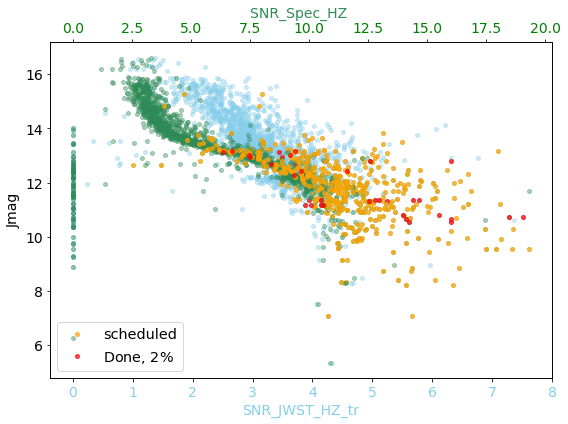

In [4]:
#target_name = ['Sp1444+3002','Sp1153+0659']
#target_idx = [np.where((df['Sp_ID'] == target_name[i]))[0][0] for i in range(len(target_name))]
#print(target_idx)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(df['SNR_JWST_HZ_tr'][observed_on_going],df['J'][observed_on_going],\
         '.',markersize=8,markerfacecolor="orange",markeredgewidth=1,alpha=0.7,color='orange',label='scheduled',zorder=2)#
ax1.plot(df['SNR_JWST_HZ_tr'][observed_done],df['J'][observed_done],\
         '.',markersize=8,markerfacecolor="red",markeredgewidth=1,alpha=0.7,color='red',label=r'Done, $2\%$',zorder=3)
ax1.plot(df['SNR_JWST_HZ_tr'],df['J'],'.',markersize=8,color='skyblue',alpha=0.4,zorder=1)

#ax1.plot(df['SNR_JWST_HZ_tr'][target_idx],df['J'][target_idx],'8',markersize=6,color='blue',alpha=0.9,zorder=6,label="target in SNRjwst")
#ax1.plot(df['SNR_JWST_HZ_tr'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

ax1.set_xlabel('SNR_JWST_HZ_tr',fontsize=14,color='skyblue')
ax1.set_ylabel('Jmag',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='skyblue')
ax1.legend(fontsize='x-large',loc=3)
ax2 = ax1.twiny()
ax2.plot(df['SNR_Spec_HZ'],df['J'],'.',markersize=8,color='seagreen',alpha=0.4,zorder=1)
ax2.plot(df['SNR_Spec_HZ'][observed_on_going],df['J'][observed_on_going],'.',\
         markersize=8,color='orange',markerfacecolor="orange",markeredgewidth=1,alpha=0.7,zorder=3)
ax2.plot(df['SNR_Spec_HZ'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',markerfacecolor="red",markeredgewidth=1,alpha=0.7,zorder=3)

#ax2.plot(df['SNR_Spec_HZ'][target_idx],df['J'][target_idx],'8',markersize=6,color='springgreen',alpha=0.9,zorder=4,label="target in SNRt1b")
#ax2.plot(df['SNR_T1b'][program2],df['J'][program2],'8',markersize=6,color='pink',alpha=0.9,zorder=4,label="program2")

ax2.set_xlabel('SNR_Spec_HZ ',fontsize=14,color="seagreen")
ax2.set_ylabel('Jmag',fontsize=14)
ax2.tick_params(axis="x", labelsize=14, labelcolor="seagreen")
#ax2.set_xlim([1,21])


#plt.plot(df['SNR_JWST_HZ_tr'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
#plt.plot(df['SNR_JWST_HZ_tr'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
#plt.plot(df['SNR_JWST_HZ_tr'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
#plt.plot(df['SNR_JWST_HZ_tr'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')
ax2.tick_params(axis='x', labelcolor='green')
#ax2.legend(fontsize='x-large',loc=1)
fig.tight_layout()
plt.savefig('Jmag_vs_SNRs.pdf')
plt.show()

[1045, 833]


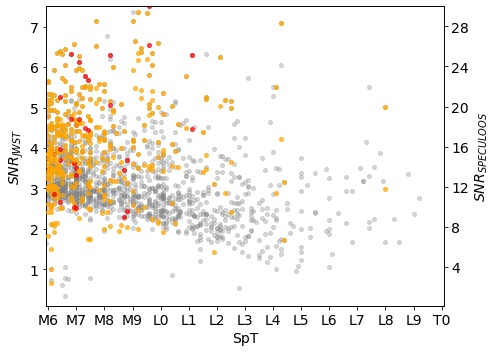

In [14]:
target_name = ['Sp1444+3002','Sp1153+0659']
target_idx = [np.where((df['Sp_ID'] == target_name[i]))[0][0] for i in range(len(target_name))]
print(target_idx)

fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(df['SpT'][observed_on_going],df['SNR_JWST_HZ_tr'][observed_on_going],'.',markersize=8,markerfacecolor="orange",markeredgewidth=1,alpha=0.7,color='orange',label=r'On going, $12\%$',zorder=2)
ax1.plot(df['SpT'][observed_done],df['SNR_JWST_HZ_tr'][observed_done],'.',markersize=8,markerfacecolor="red",markeredgewidth=1,alpha=0.7,color='red',label=r'Done, $1\%$',zorder=3)
ax1.plot(df['SpT'],df['SNR_JWST_HZ_tr'],'.',markersize=8,color='gray',alpha=0.3,zorder=1)

#ax1.plot(df['SNR_JWST_HZ_tr'][target_idx],df['SpT'][target_idx],'8',markersize=6,color='blue',alpha=0.9,zorder=6,label="target in SNRjwst")
#ax1.plot(df['SNR_JWST_HZ_tr'][to_be_done],df['SpT'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program1],df['SpT'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program2],df['SpT'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program3],df['SpT'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

ax1.set_xlabel('SpT',fontsize=14)
ax1.set_ylabel(r'$SNR_{JWST}$',fontsize=14,color='k')
ax1.tick_params(axis="x", labelsize=14, labelcolor="k")
ax1.tick_params(axis='y', labelsize=14,labelcolor='k')


loc_spt = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
label = ['M6','M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0']
ax1.set_xticks(loc_spt)
ax1.set_xticklabels(label)
ax1.set_ylim([0.1,7.5])
ax1.set_xlim([5.9,20.1])

#ax1.legend(fontsize='x-large',loc=3)
ax2 = ax1.twinx()

loc = [4,8,12,16,20,24,28,31]
ax2.set_yticks(loc)
ax2.set_yticklabels(loc)

ax2.set_ylim([0.1,30])
#ax2.plot(df['SpT'],df['SNR_Spec_temp'],'.',markersize=8,color='seagreen',alpha=0.4,zorder=1)
ax2.plot(df['SpT'][observed_on_going],df['SNR_Spec_temp'][observed_on_going],'.',markersize=8,color='orange',markerfacecolor="orange",markeredgewidth=1,alpha=0.7,zorder=3)
ax2.plot(df['SpT'][observed_done],df['SNR_Spec_temp'][observed_done],'.',markersize=8,color='red',markerfacecolor="red",markeredgewidth=1,alpha=0.7,zorder=3)

#ax2.plot(df['SNR_Spec_HZ'][target_idx],df['SpT'][target_idx],'8',markersize=6,color='springgreen',alpha=0.9,zorder=4,label="target in SNRt1b")
#ax2.plot(df['SNR_T1b'][program2],df['SpT'][program2],'8',markersize=6,color='pink',alpha=0.9,zorder=4,label="program2")

ax2.set_ylabel(r'$SNR_{SPECULOOS}$ ',fontsize=14,color="k")
#ax2.set_xlabel('SpT',fontsize=14)
ax2.tick_params(axis="y", labelsize=14, labelcolor="k")


#plt.plot(df['SNR_JWST_HZ_tr'][trappist],df['SpT'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
#plt.plot(df['SNR_JWST_HZ_tr'][sso],df['SpT'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
#plt.plot(df['SNR_JWST_HZ_tr'][artemis],df['SpT'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
#plt.plot(df['SNR_JWST_HZ_tr'][saint_ex],df['SpT'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')
#ax2.legend(fontsize='x-large',loc=1)

fig.tight_layout()
plt.savefig('Jmag_vs_SNRs_spock.pdf', bbox_inches="tight")
plt.show()

In [54]:
a = np.where((df['Program'][observed_done]==1.0))[0]
b = np.where((df['Program'][observed_on_going]==1.0))[0]

orange = list(df['Sp_ID'][observed_done])+list(df['Sp_ID'][observed_on_going])
SNR_limit = 6.
SNR_more_4_prog1 = np.where(((df['SNR_JWST_HZ_tr'] >=SNR_limit) & (df['Program'] ==1.0) ))[0]
SNR_more_4_prog1_started = np.where(((df['SNR_JWST_HZ_tr'] >=SNR_limit) & (df['Program'] ==1.0) & (df['nb_hours_surved'] >0)))[0]

len(df['nb_hours_surved'][SNR_more_4_prog1_started])/len(df['nb_hours_surved'][SNR_more_4_prog1])

0.8387096774193549

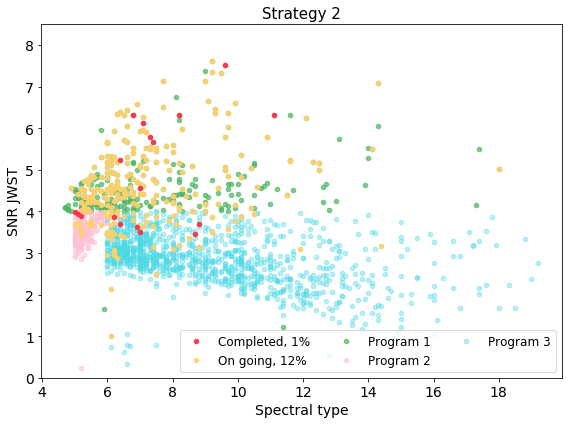

In [46]:


fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(df['SpT'][observed_done_prog1[0]],df['SNR_JWST_HZ_tr'][observed_done_prog1[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4)
ax1.plot(df['SpT'][observed_done_prog2[0]],df['SNR_JWST_HZ_tr'][observed_done_prog2[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4)
ax1.plot(df['SpT'][observed_done_prog3[0]],df['SNR_JWST_HZ_tr'][observed_done_prog3[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4,label='Completed, 1%')

ax1.plot(df['SpT'][observed_on_going_prog1[0]],df['SNR_JWST_HZ_tr'][observed_on_going_prog1[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2)
ax1.plot(df['SpT'][observed_on_going_prog2[0]],df['SNR_JWST_HZ_tr'][observed_on_going_prog2[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2)
ax1.plot(df['SpT'][observed_on_going_prog3[0]],df['SNR_JWST_HZ_tr'][observed_on_going_prog3[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2,label='On going, 12%')

#ax1.plot(df['SpT'][observed_done],df['SNR_JWST_HZ_tr'][observed_done],'.',markersize=8,markerfacecolor="red",markeredgewidth=1,alpha=0.7,color='red',label=r'Done, $2\%$',zorder=3)
ax1.plot(df['SpT'][program1[0]],df['SNR_JWST_HZ_tr'][program1[0]],'.',markersize=9,color='#4AB361',alpha=0.7,zorder=1,label="Program 1")
ax1.plot(df['SpT'][program2[0]],df['SNR_JWST_HZ_tr'][program2[0]],'.',markersize=9,color='#FFC2D4',alpha=0.6,zorder=1,label="Program 2")
ax1.plot(df['SpT'][program3[0]],df['SNR_JWST_HZ_tr'][program3[0]],'.',markersize=9,color='#4CD9E6',alpha=0.4,zorder=1,label="Program 3")

ax1.set_xlabel('Spectral type',fontsize=14,color='k')
ax1.set_ylabel('SNR JWST',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='k')
ax1.legend(fontsize='large',loc=4,ncol=3)
#ax2 = ax1.twiny()
ax1.set_ylim([0,8.5])

plt.title('Strategy 2',fontsize=15)
fig.tight_layout()
plt.savefig('SpT_vs_SNR_prog_2020.pdf',bbox_inches='tight')
plt.show()

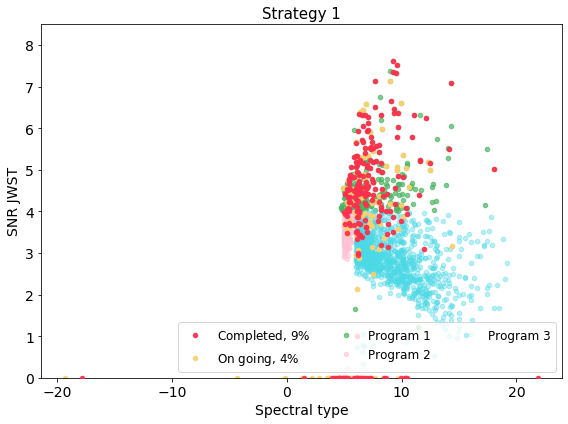

In [8]:


fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(df['SpT'][observed_done_strategy1[0]],df['SNR_JWST_HZ_tr'][observed_done_strategy1[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4,label=r'Completed, $9\%$')

ax1.plot(df['SpT'][observed_on_going_strategy1[0]],df['SNR_JWST_HZ_tr'][observed_on_going_strategy1[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2,label=r'On going, $4\%$')

ax1.plot(df['SpT'][program1[0]],df['SNR_JWST_HZ_tr'][program1[0]],'.',markersize=9,color='#4AB361',alpha=0.7,zorder=1,label="Program 1")
ax1.plot(df['SpT'][program2[0]],df['SNR_JWST_HZ_tr'][program2[0]],'.',markersize=9,color='#FFC2D4',alpha=0.6,zorder=1,label="Program 2")
ax1.plot(df['SpT'][program3[0]],df['SNR_JWST_HZ_tr'][program3[0]],'.',markersize=9,color='#4CD9E6',alpha=0.4,zorder=1,label="Program 3")

ax1.set_xlabel('Spectral type',fontsize=14,color='k')
ax1.set_ylabel('SNR JWST',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='k')
ax1.legend(fontsize='large',loc=4,ncol=3)
#ax2 = ax1.twiny()
ax1.set_ylim([0,8.5])
plt.title('Strategy 1',fontsize=15)
fig.tight_layout()
plt.savefig('SpT_vs_SNR_prog_1819.pdf',bbox_inches='tight')
plt.show()

In [9]:
df['SpT'][observed_on_going_prog1[0]]

5        9.4
10       5.2
13       5.4
17       5.5
31       8.3
40       6.9
42       6.5
55      12.1
84       7.2
94      10.1
95       9.1
97       8.2
98       5.8
137      5.3
145      6.8
155      5.2
156      7.3
157      5.5
162      5.4
165      7.7
190      6.1
194      7.0
202      6.6
203      6.9
205      5.5
206      8.2
207     18.0
217      8.0
226     10.1
227      5.6
233      7.3
249      5.4
273      6.1
291     12.3
306      7.4
308      7.7
310      5.4
315      6.8
328      5.8
334      5.4
353      6.3
370      6.4
375      5.8
377      6.0
379      7.2
384      7.8
387     11.6
404      6.1
405      6.3
406      7.1
414      7.5
418      5.4
427      9.9
428      5.4
439      6.1
476      8.0
480      5.6
482     14.1
484      9.6
507      5.5
509      7.5
524      6.0
541      6.2
543      6.7
551     10.4
555      6.0
566      7.9
603      6.3
605      6.8
613      6.3
615     14.3
617      5.4
618      6.0
637      9.0
645      6.2
649      7.0
669     11.5

# Plots Meeting

In [2]:
# ---------------------- LONG TERM SCHEDULER ---------------------
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import FixedTarget, Observer
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
obs = 2
schedule = SPOCKLT.Schedules()
schedule.load_parameters('./input.csv',obs)
df = schedule.target_table_spc
df[312]

INFO: Updating the number of hours observed


Sp_ID,2MASS_ID,Filter,texp_spc,nb_hours_threshold,nb_hours_surved,Gaia_ID,Program,RA,DEC,pm_RA,pm_DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,SNR_JWST_temp_occ
str11,str16,str3,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str40,float64
Sp0530+1503,05302948+1503368,I+z,0,100.0,0.0,3390022703255507328,3,82.6229,15.0602,165.174,-178.515,17.3008,15.3462,13.066,12.486,12.031,27.8864,0.1668,0.0914,0.0028,0.1167,0.0132,2622.9395,104.7526,7.42,1.0683,2.4188,9.016,1.7103,6.6396,3.4318,0.9799,[],3.0054


In [3]:
df_exp = pd.read_csv('exposure_time_table.csv',delimiter=',')
idx_prog1 = np.where(((df['Program'] == 1) )) #& (df['Program'] == 3)))
idx_faintess = np.where((max(df['SpT'][idx_prog1])))
df[idx_prog1[0]][76]

Sp_ID,2MASS_ID,Filter,texp_spc,nb_hours_threshold,nb_hours_surved,Gaia_ID,Program,RA,DEC,pm_RA,pm_DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,SNR_JWST_temp_occ
str11,str16,str3,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str40,float64
Sp1753-2312,17531132-2312268,I+z,0,0.0,0.0,4068644101753728512,1,268.2997,-23.207,-199.354,130.68200000000002,19.6311,17.6787,13.956,12.476,12.031,9.2615,0.0866,0.0637,0.0198,0.0744,0.0361,1662.5057,349.6728,14.27,3.5466,1.6884,11.7222,1.1939,8.2888,6.0626,4.7337,[],14.238


In [4]:
coords = SkyCoord(frame='icrs', ra=df['RA'], dec=df['DEC'],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation) 
observed_on_going = np.where((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] ==0))
coords = SkyCoord(frame='icrs', ra=118, dec=-24,unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
coord_cartesian.x.value, coord_cartesian.y.value, coord_cartesian.z.value

(-0.42888361367542377, 0.8066127627927412, -0.4067366430758002)

In [5]:
halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]

degs, rads = 180/pi, pi/180

# do radians first, then convert later

nstars = 2000

ran1, ran2 = np.random.random(2*nstars).reshape(2, -1)

RA  = twopi * (ran1 - 0.5)
dec = np.arcsin(2.*(ran2-0.5)) # Hey Barry Carter!

funcs = [np.cos, np.sin]

cosRA,  sinRA  = [f(RA)  for f in funcs]
cosdec, sindec = [f(dec) for f in funcs]

x = cosRA * cosdec
y = sinRA * cosdec
z = sindec

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.

theta = np.linspace(0, twopi, 101)

costh, sinth = [f(theta) for f in funcs]
zerth = np.zeros_like(theta)

fig = plt.figure(figsize= [8, 8])

ax  = fig.add_subplot(1, 1, 1, projection='3d')

#ax.plot(x, y, z, '.k')

#for i in range(len(df)):
#plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='gainsboro',alpha=0.9, markersize=6,zorder=2,label='To be done')
#plt.plot(coord_cartesian[observed_on_going].x, coord_cartesian[observed_on_going].y, coord_cartesian[observed_on_going].z,'.', color='orange',alpha=0.9, markersize=6,zorder=3,label='On going')
#plt.plot(coord_cartesian[observed_done].x, coord_cartesian[observed_done].y, coord_cartesian[observed_done].z,'.', color='red',alpha=0.9, markersize=6,zorder=4,label='Done')
coords = SkyCoord(frame='icrs', ra=[df['RA'][418],df['RA'][418]+2], dec=[df['DEC'][418],df['DEC'][418]+2],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='pink',alpha=0.9, markersize=6,zorder=2,label='To be done')

    
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)
ax.tick_params(axis="x", labelsize=12, labelcolor="k")
ax.tick_params(axis="y", labelsize=12, labelcolor="k")
ax.tick_params(axis="z", labelsize=12, labelcolor="k")
ax.view_init(elev=20, azim=47)

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.
# lines of declination
xvals = costh * np.cos(decs)[:, None]
yvals = sinth * np.cos(decs)[:, None]
zvals = zerth + np.sin(decs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)

# lines of Right Ascention
xvals = costh * np.cos(RAs)[:, None]
yvals = costh * np.sin(RAs)[:, None]
zvals = sinth + np.zeros_like(RAs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)
plt.legend(fontsize='xx-large')

plt.savefig('./SPOCK_Figures/All_sky_cartesian_done_or not.pdf')

<IPython.core.display.Javascript object>

In [6]:
halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]

degs, rads = 180/pi, pi/180

# do radians first, then convert later

nstars = 2000

ran1, ran2 = np.random.random(2*nstars).reshape(2, -1)

RA  = twopi * (ran1 - 0.5)
dec = np.arcsin(2.*(ran2-0.5)) # Hey Barry Carter!

funcs = [np.cos, np.sin]

cosRA,  sinRA  = [f(RA)  for f in funcs]
cosdec, sindec = [f(dec) for f in funcs]

x = cosRA * cosdec
y = sinRA * cosdec
z = sindec

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.

theta = np.linspace(0, twopi, 101)

costh, sinth = [f(theta) for f in funcs]
zerth = np.zeros_like(theta)


fig = plt.figure(figsize= [14, 14])

ax  = fig.add_subplot(1, 1, 1, projection='3d')

io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)

#for i in range(len(df)):
plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='gainsboro',alpha=0.5,markersize=8, linewidth=0.8,zorder=2,label='Remaining')
plt.plot(coord_cartesian[trappist].x, coord_cartesian[trappist].y, coord_cartesian[trappist].z,'.', color='purple',alpha=0.5, markersize=8,zorder=3,label='TRAPPIST')

plt.plot(coord_cartesian[io].x, coord_cartesian[io].y, coord_cartesian[io].z,'.', color='red',alpha=0.5, markersize=8,zorder=3,label='Io')
plt.plot(coord_cartesian[europa].x, coord_cartesian[europa].y, coord_cartesian[europa].z,'.', color='blue',alpha=0.5, markersize=8,zorder=4,label='Europa')
plt.plot(coord_cartesian[ganymede].x, coord_cartesian[ganymede].y, coord_cartesian[ganymede].z,'.', color='orange',alpha=0.5, markersize=8,zorder=4,label='Ganymede')
plt.plot(coord_cartesian[callisto].x, coord_cartesian[callisto].y, coord_cartesian[callisto].z,'.', color='turquoise',alpha=0.5, markersize=8,zorder=4,label='Callisto')

plt.plot(coord_cartesian[artemis].x, coord_cartesian[artemis].y, coord_cartesian[artemis].z,'.', color='green',alpha=0.5, markersize=8,zorder=4,label='Artemis')
plt.plot(coord_cartesian[saint_ex].x, coord_cartesian[saint_ex].y, coord_cartesian[saint_ex].z,'.', color='gold',alpha=0.5, markersize=8,zorder=4,label='Saint-Ex')


ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_zlim(-1.1,1.1)


decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.
# lines of declination
xvals = costh * np.cos(decs)[:, None]
yvals = sinth * np.cos(decs)[:, None]
zvals = zerth + np.sin(decs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)

# lines of Right Ascention
xvals = costh * np.cos(RAs)[:, None]
yvals = costh * np.sin(RAs)[:, None]
zvals = sinth + np.zeros_like(RAs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.7, linewidth=0.8,zorder=1)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)
ax.tick_params(axis="x", labelsize=12, labelcolor="dimgrey")
ax.tick_params(axis="y", labelsize=12, labelcolor="dimgrey")
ax.tick_params(axis="z", labelsize=12, labelcolor="dimgrey")
ax.view_init(elev=1, azim=47)
plt.legend(fontsize='xx-large')
plt.savefig('./SPOCK_Figures/All_sky_cartesian_which_telescope.pdf')

import plotly.tools as tls

import matplotlib.animation as animation
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
#ani = animation.FuncAnimation(fig, fig_GIF,frames=2000, interval=20, blit=True)



<IPython.core.display.Javascript object>

IndexError: index 138 is out of bounds for axis 0 with size 2

In [ ]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import FixedTarget, Observer

location = EarthLocation.from_geodetic(-70.40300000000002*u.deg, -24.625199999999996*u.deg,2635.0000000009704*u.m)
observatory = Observer(location=location, name="SSO", timezone="UTC")
observed_on_going = np.where((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100))
observed_done = np.where((df['nb_hours_surved'] > 100))
#to_be_done = np.where((df['nb_hours_surved'] == 0))
targets_on_going = [FixedTarget(coord=coords[i],name=df['Sp_ID'][observed_on_going][i]) for i in range(len(df[observed_on_going]))]
targets_done = [FixedTarget(coord=coords[i],name=df['Sp_ID'][observed_done][i]) for i in range(len(df[observed_done]))]

observe_time = Time(['2020-01-16T00:00:00'])
not_done = {'color': 'gainsboro'}
done = {'color': 'red'}
on_going = {'color': 'orange'}

plt.figure()
plot_sky(targets, observatory, observe_time,style_kwargs=not_done)
plot_sky(targets_done, observatory, observe_time,style_kwargs=done)
#plot_sky(targets_on_going, observatory, observe_time,style_kwargs=on_going)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [ ]:
df['RA'][418]

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
plt.figure(figsize=(8,6))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
observed_on_going = np.where(((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100)))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] == 0))

plt.plot(df['RA'][observed_on_going], df['DEC'][observed_on_going], 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='On going (#' + str(len(df['RA'][observed_on_going])) + ')' )
plt.plot(df['RA'][to_be_done], df['DEC'][to_be_done], 'o', markersize=5, alpha=0.3,color='gray',zorder=1,label='To be done (#' + str(len(df['RA'][to_be_done])) + ')')
plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=12, labelcolor="k")
ax.tick_params(axis="y", labelsize=12, labelcolor="k")
#plt.legend(fontsize='xx-large',loc=4)
plt.grid(True)

plt.savefig('./SPOCK_Figures/All_sky_nb_hours_archived.pdf')
plt.show()

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
plt.figure(figsize=(10,8))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
plt.grid(True)
io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)
#plt.plot(coords[io].ra, coords[io].dec, 'o', markersize=5, alpha=0.8,color='red',zorder=2,label='Io')
plt.plot(df['RA'][europa], df['DEC'][europa], 'o', markersize=5, alpha=0.8,color='blue',zorder=2,label='Europa' )
plt.plot(df['RA'][ganymede], df['DEC'][ganymede], 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='Ganymede')
plt.plot(df['RA'][callisto], df['DEC'][callisto], 'o', markersize=5, alpha=0.8,color='turquoise',zorder=2,label='Callisto')
plt.plot(df['RA'][artemis], df['DEC'][artemis], 'o', markersize=5, alpha=0.8,color='green',zorder=2,label='Artemis')
plt.plot(df['RA'][trappist], df['DEC'][trappist], 'o', markersize=5, alpha=0.8,color='purple',zorder=2,label='TRAPPIST')

plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.legend(fontsize='xx-large',loc=4)
plt.savefig('./SPOCK_Figures/All_sky_telescope.pdf')
plt.show()

In [ ]:
# ---------------------- LONG TERM SCHEDULER ---------------------
from astropy.table import Table
df_read = pd.read_csv('speculoos_target_list_webupdate.txt', delimiter=' ')
df = Table.from_pandas(df_read)

c = [SkyCoord(str(df['RA1'][i]) + ' ' +  str(df['RA2'][i]) + ' ' + str(round(df['RA3'][i])) + ' ' + str(df['DEC1'][i]) + ' ' + str(df['DEC2'][i]) + ' ' + str(round(df['DEC3'][i])), unit=(u.hourangle, u.deg)) for i in range(len(df))]

c

In [ ]:
c[list(observed_done[0])]

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
plt.figure(figsize=(14,12))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
plt.grid(True)
observed_on_going = np.where(((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100)))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] == 0))
plt.plot(c[observed_done].ra, c[observed_done].dec, 'o', markersize=5, alpha=0.8,color='red',zorder=2,label='Done (#' + str(len(df['RA'][observed_done])) + ')' )
plt.plot(c[observed_on_going].ra, c[observed_on_going].dec, 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='On going (#' + str(len(df['RA'][observed_on_going])) + ')' )
plt.plot(c[to_be_done].ra, c[to_be_done].dec, 'o', markersize=5, alpha=0.3,color='gray',zorder=1,label='To be done (#' + str(len(df['RA'][to_be_done])) + ')')
plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.legend(fontsize='xx-large',loc=4)
plt.show()

In [ ]:
program1 = np.where((df['prog']==1))
program2 = np.where((df['prog']==2))
program3 = np.where((df['prog']==3))
sso = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        sso.append(i)
    if 'Europa' in df['telescope'][i]:
        sso.append(i)
    if 'Ganymede' in df['telescope'][i]:
        sso.append(i)
    if 'Callisto' in df['telescope'][i]:
        sso.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)

plt.figure(figsize=(8,6))
ax = plt.gca()
#plt.plot(df['SpT'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,color='orange',label='on going',zorder=2)
#plt.plot(df['SpT'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',label='done',zorder=2)
plt.plot(df['SpT'],df['J'],'.',markersize=8,color='gainsboro',alpha=0.4,zorder=1,label='Target list stars')
#plt.plot(df['SpT'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#plt.plot(df['SpT'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#plt.plot(df['SpT'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#plt.plot(df['SpT'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

plt.plot(df['SpT'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
plt.plot(df['SpT'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
plt.plot(df['SpT'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
plt.plot(df['SpT'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')


plt.legend(fontsize='xx-large',loc=4)
ax.set_xlabel('Spectral type',fontsize=14)
ax.set_ylabel('J magnitude',fontsize=14)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.savefig('Spt_vs_Jmag_telescope.pdf')
plt.show()

[849, 670]


<IPython.core.display.Javascript object>


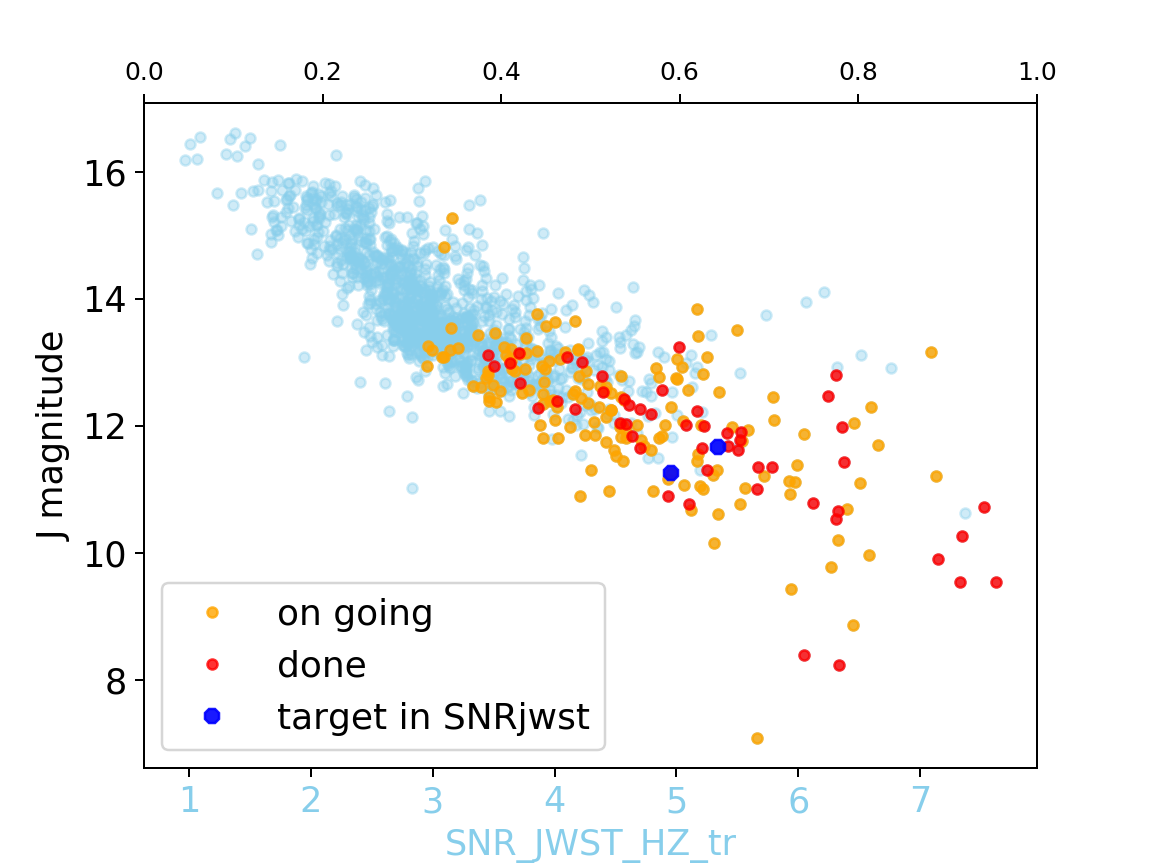

KeyError: 'SNR_T1b'

In [7]:
target_name = ['Sp1444+3002','Sp1153+0659']
target_idx = [np.where((df['Sp_ID'] == target_name[i]))[0][0] for i in range(len(target_name))]
print(target_idx)

fig, ax1 = plt.subplots()
ax1.plot(df['SNR_JWST_HZ_tr'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,alpha=0.8,color='orange',label='on going',zorder=2)
ax1.plot(df['SNR_JWST_HZ_tr'][observed_done],df['J'][observed_done],'.',markersize=8,alpha=0.8,color='red',label='done',zorder=3)
ax1.plot(df['SNR_JWST_HZ_tr'],df['J'],'.',markersize=8,color='skyblue',alpha=0.4,zorder=1)
ax1.plot(df['SNR_JWST_HZ_tr'][target_idx],df['J'][target_idx],'8',markersize=6,color='blue',alpha=0.9,zorder=6,label="target in SNRjwst")
#ax1.plot(df['SNR_JWST_HZ_tr'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

ax1.set_xlabel('SNR_JWST_HZ_tr',fontsize=14,color='skyblue')
ax1.set_ylabel('J magnitude',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='skyblue')
ax1.legend(fontsize='x-large',loc=3)
ax2 = ax1.twiny()
ax2.plot(df['SNR_T1b'],df['J'],'.',markersize=8,color='seagreen',alpha=0.4,zorder=1)
ax2.plot(df['SNR_T1b'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,color='orange',zorder=3)
ax2.plot(df['SNR_T1b'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',zorder=3)
ax2.plot(df['SNR_T1b'][target_idx],df['J'][target_idx],'8',markersize=6,color='springgreen',alpha=0.9,zorder=4,label="target in SNRt1b")
#ax2.plot(df['SNR_T1b'][program2],df['J'][program2],'8',markersize=6,color='pink',alpha=0.9,zorder=4,label="program2")

ax2.set_xlabel('SNR_T1b ',fontsize=14,color="seagreen")
ax2.set_ylabel('J magnitude',fontsize=14)
ax2.tick_params(axis="x", labelsize=14, labelcolor="seagreen")
#ax2.set_xlim([0,20])


#plt.plot(df['SNR_JWST_HZ_tr'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
#plt.plot(df['SNR_JWST_HZ_tr'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
#plt.plot(df['SNR_JWST_HZ_tr'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
#plt.plot(df['SNR_JWST_HZ_tr'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')
ax2.tick_params(axis='x', labelcolor='green')
ax2.legend(fontsize='x-large',loc=1)
fig.tight_layout()
plt.savefig('Spt_vs_SNRs_Sp0823+6125.pdf')
plt.show()

In [ ]:
np.where((df['SNR_T1b'] == max(df['SNR_T1b'][observed_on_going]))),\
np.where((df['SNR_T1b'][observed_on_going] == max(df['SNR_T1b'][observed_on_going]))),observed_on_going[0][np.where((df['SNR_T1b'][observed_on_going] == max(df['SNR_T1b'][observed_on_going])))],\
df['Sp_ID'][observed_on_going[0][np.where((df['SNR_T1b'][observed_on_going] == max(df['SNR_T1b'][observed_on_going])))]]



In [ ]:
len(df['SNR_JWST_HZ_tr'][observed_on_going])/len(df['SNR_JWST_HZ_tr'])

In [ ]:

idx = np.where((df['SNR_JWST_HZ_tr'][observed_done] == max(df['SNR_JWST_HZ_tr'][observed_done])))
idx_in_df = observed_done[0][idx][0]
np.where((df['SNR_JWST_HZ_tr'] == max(df['SNR_JWST_HZ_tr'][observed_done]))),df['Sp_ID'][idx_in_df]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(df['prog'],df['J'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(df['prog'], df['J'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
faint = np.where((df['J'] > 12.8))
len(df['J'][faint]),len(df['J'])

In [ ]:
from docx import Document

document = Document()
document.save('test.docx')

In [10]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Schedule from ', 0)

p = document.add_paragraph('Operator is charge is ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)


document.save('demo.docx')

In [ ]:
from docx import Document
from docx.shared import *
from docx.enum.text import *

doc = Document()
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
par_format.space_after = Pt(6)
run = par.add_run('       TRAPPIST-South          ')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(16)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
run = par.add_run('Schedule from 10 Jul 2017 to 12 Jul 2017 ')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(16)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
run = par.add_run('(Total time = 0hr, technical loss = 0hr, weather loss = 0hr, Exotime = 0hr, cometime = 0hr, chilean time = 0hr)')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(12)
font.color.rgb = RGBColor(255, 0, 0)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
par_format.space_after = Pt(6)
run = par.add_run('[Michael]')
run.italic = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(12)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
#doc.add_page_break()
#doc.add_picture('a.png',width=Inches(6.0))
doc.save('test.docx')


In [ ]:
from docx import Document
from docx.shared import *
from docx.enum.text import *
from astropy.table import Table

obs = 5
schedule = SPOCKLT.Schedules()
schedule.load_parameters('./input.csv',obs)
df = schedule.target_table_spc

date_range = schedule.date_range
observatory = schedule.observatory
telescope =schedule.telescope

def read_night_block(telescope,day):
    day_fmt = Time(day, scale='utc', out_subfmt='date').tt.datetime.strftime("%Y-%m-%d")
    scheduler_table = Table.read('./DATABASE/' + str(telescope) +'/night_blocks_'+ str(telescope) +'_' + str(day_fmt)+'.txt', format='ascii')
    return scheduler_table    

def make_docx_schedule(observatory,date_range,name_operator):
    
    nb_day_date_range  =  date_range_in_days(date_range)
    telescope =schedule.telescope
    doc = Document()
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt( 6)
    run = par.add_run(observatory.name)
    run.bold = True
    font = run.font
    font.size = Pt(16)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(12)
    run = par.add_run('Schedule from ' + Time(date_range[0], out_subfmt='date').value + ' to ' + Time(date_range[1], out_subfmt='date').value)
    run.bold = True
    font = run.font
    font.size = Pt(16)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(12)
    run = par.add_run('(Total time = 0hr, technical loss = 0hr, weather loss = 0hr, Exotime = 0hr, cometime = 0hr,   chilean time = 0hr)')
    run.bold = True
    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(255,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(20)
    run = par.add_run(name_operator)
    run.italic = True
    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.space_before = Pt(16)
    par_format.space_after = Pt( 0)
        
    for i in range(0,8):
        
        date = date_range[0] + i
        read_night_block(telescope,date)
        
        table_schedule = read_night_block(telescope,date)
        idx_target = [np.where(( df['Sp_ID'] == table_schedule['target'][i])) for i in range(len(table_schedule))]

        sun_set = observatory.sun_set_time(date,which='next').iso 
        sun_rise = observatory.sun_rise_time(date,which='next').iso  
        moon_illumination = int(round(astroplan.moon_illumination(date)*100,0)) *u.percent
        civil_twilights = [Time(observatory.twilight_evening_civil(date ,which='next')).iso,Time(observatory.twilight_morning_civil(date +1 ,which='nearest')).iso]
        nautic_twilights = [Time(observatory.twilight_evening_nautical(date ,which='next')).iso,Time(observatory.twilight_morning_nautical(date +1 ,which='nearest')).iso]
        astro_twilights =[Time(observatory.twilight_evening_astronomical(date ,which='next')).iso,Time(observatory.twilight_morning_astronomical(date +1 ,which='nearest')).iso]
        start_night = table_schedule['start time (UTC)'][0]
        end_night = table_schedule['end time (UTC)'][-1]
        night_duration = round((Time(end_night) - Time(start_night)).jd * 24,3) * u.hour
        

        run = par.add_run('Night starting on the ' + Time(date, out_subfmt='date').value)
        run.bold = True
        run.underline = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Moon illumination: ' + str(moon_illumination) )
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Sunset /  Sunrise: ' + Time(sun_set, out_subfmt='date_hm').value + '  / '  + Time(sun_rise, out_subfmt='date_hm').value)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Civil/Naut./Astro. twilights: ' + Time(civil_twilights[0], out_subfmt='date_hm').value +  '/' + Time(civil_twilights[1], out_subfmt='date_hm').value +\
                          ' , ' + Time(nautic_twilights[0], out_subfmt='date_hm').value +  '/' + Time(nautic_twilights[1], out_subfmt='date_hm').value+\
                          ' , ' + Time(astro_twilights[0], out_subfmt='date_hm').value +  '/' + Time(astro_twilights[1], out_subfmt='date_hm').value)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Start-end of night (Naut. twil.): ' + start_night + ' to ' + end_night)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 3)
        run = par.add_run('Night duration (Naut. twil.): ' + str(night_duration))
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        
        
        for i in range(len(table_schedule)):
            idx_target = np.where(( df['Sp_ID'] == table_schedule['target'][i]))
            start_time_target = table_schedule['start time (UTC)'][i]
            end_time_target = table_schedule['end time (UTC)'][i]
            config = table_schedule['configuration'][i]
            dist_moon =  '34'
            
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('From ' + Time(start_time_target, out_subfmt='date_hm').value  +  ' to ' + Time(end_time_target, out_subfmt='date_hm').value   + ' : ' + str(df['Sp_ID'][idx_target].data.data[0]))
            run.bold = True
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('  Note: Prio_target                                         ')
            font = run.font
            font.size = Pt(10)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('  SPECULOOS : '  + str(df['nb_hours_surved'][idx_target].data.data[0]) +  ' hours of obs over '  + str(df['nb_hours_threshold'][idx_target].data.data[0]) )
            font = run.font
            font.size = Pt(10)
            font.color.rgb = RGBColor(  0,  0,  0) 
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('Jmag= ' + str(df['J'][idx_target].data.data[0]) + ',  SpT= ' + str(df['SpT'][idx_target].data.data[0]) )#+ ', Moon at ' + str(dist_moon))
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 3)
            run = par.add_run('  RA='  + str(round(df['RA'][idx_target].data.data[0],2) * u.degree) + ', DEC= ' + str(round(df['DEC'][idx_target].data.data[0],2)  * u.degree) + ', Config: ' + str(config) )
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt(16)
        par_format.space_after = Pt( 0)

    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(  0,  0,  0)
    doc.save('schedule.docx')


def date_range_in_days(date_range):
    date_format = "%Y-%m-%d %H:%M:%S.%f"
    date_start = datetime.datetime.strptime(date_range[0].value, date_format)
    date_end = datetime.datetime.strptime(date_range[1].value, date_format)
    date_range_in_days = (date_end - date_start).days
    return date_range_in_days  
                              
                              
make_docx_schedule(observatory,date_range,'Khalid')

In [138]:
coords = SkyCoord(frame='icrs', ra='15h09m40.9477996s', dec='-10d52m10.185124505s',unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coords.ra.hms,coords.dec.dms,coords.ra.deg,coords.dec.deg

(hms_tuple(h=15.0, m=9.0, s=40.94779960000835),
 dms_tuple(d=-10.0, m=-52.0, s=-10.185124505002392),
 227.42061583166665,
 -10.869495867918056)

# stats exposure time

In [201]:
pd.set_option("display.max_rows", 2000)

df_exp = pd.read_csv('exposure_time_table.csv',sep=',')
df_v5 = pd.read_csv('speculoos_target_list_v5.txt',sep=' ')

idx_too_large = np.where((df_exp['SSO_texp']>100))[0]
idx_not_zero = np.where((df_exp['SSO_texp']>0 ))[0]


len(df_exp),len(df_exp['SSO_texp'][idx_not_zero]),len(df_exp['SSO_texp'][idx_too_large])/len(df_exp['SSO_texp'][idx_not_zero])*100




(1730, 1730, 54.73988439306359)

In [198]:
idx_prog = np.where((df_v5['Program']==5.0))[0]

len(df_v5['Sp_ID'][idx_prog])



73

# target list with minimal info

In [59]:
import pandas as pd

In [60]:
target_list = pd.read_csv('/Users/elsaducrot/spock_2/speculoos_target_list_v6.txt',sep=' ')

target_list

,Sp_ID,2MASS,Gaia_ID,wise,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,e_gra,e_gdec,telescope,Filter_spc,texp_spc,Filter_trap,texp_trap,dist,dist_err,SpT,e_SpT,Ms,e_Ms,Rs,e_Rs,T_eff,...,mag_rp,mag_rp_err,Habs,e_Habs,Jabs,e_Jabs,Kabs,e_Kabs,Gabs,e_Gabs,BCj,BCj_err,L_bol,L_bol_err,cf,num_stars,min_dist_stars,avg_dist_stars,rel_flux_stars,plx,plx_err,pmra,pmdec,pmra_err,pmdec_err
0,Sp0000-1245,00002867-1245153,2421137424841635840,J000028.55-124516.4,3.0,0.000,100.0,0.119375,-12.754211,0.217513,0.175008,[],I+z,0,I+z,0,31.3,0.3,6.6,1.0,0.100,0.001,0.115,0.01,2743.0,...,16.111702,0.011850,9.973791,0.030389,10.723791,0.032719,9.493791,0.030389,15.295075,0.019940,1.944422,0.020436,0.000674,0.000024,0.03,2,31.21,0.0,0.0,0.0,0.0,-142.649,-109.722,0.487,0.393
1,Sp0001+1535,00011217+1535355,2772182900286956160,J000112.27+153533.6,3.0,0.000,100.0,0.300711,15.593207,1.336255,1.123361,[],I+z,0,I+z,0,31.6,1.8,12.5,1.2,0.072,0.006,0.088,0.01,1891.0,...,19.089884,0.069002,12.010445,0.134592,13.020445,0.138383,11.210445,0.131308,18.298563,0.124424,1.833235,0.097357,0.000090,0.000014,0.17,3,38.62,0.0,0.0,0.0,0.0,143.485,-174.725,4.470,2.397
2,Sp0002+0115,00020623+0115360,2738415592529108096,J000206.54+011536.8,1.0,0.000,200.0,0.525907,1.260039,0.123008,0.059531,[],I+z,0,I+z,0,20.8,0.1,6.5,1.0,0.098,0.001,0.122,0.01,2749.0,...,14.804235,0.005772,9.948640,0.023851,10.578640,0.022888,9.538640,0.023851,14.745651,0.006380,1.942325,0.021511,0.000772,0.000022,0.04,2,31.32,0.0,0.0,0.0,0.0,463.376,61.406,0.238,0.116
3,Sp0004+5843,00040760+5843007,423130041883475968,J000407.49+584259.9,3.0,0.000,100.0,1.031405,58.716818,0.254431,0.248917,[],I+z,0,I+z,0,35.2,0.5,7.4,1.1,0.093,0.001,0.112,0.01,2626.0,...,16.681629,0.005755,10.256571,0.051634,10.966571,0.051634,9.746571,0.045189,15.637259,0.028775,1.957240,0.012687,0.000533,0.000026,1.79,47,6.46,0.0,0.0,0.0,0.0,-69.913,-55.894,0.479,0.425
4,Sp0004-1709,00045753-1709369,2414623952318068224,J000457.65-170937.0,2.0,0.000,100.0,1.239817,-17.160266,0.101244,0.060719,[],I+z,0,I+z,0,17.0,0.0,5.0,0.9,0.121,0.001,0.149,0.02,2985.0,...,13.200805,0.002933,9.302321,0.021482,9.842321,0.022460,8.922321,0.021482,13.447108,0.004566,1.898704,0.032507,0.001583,0.000058,0.00,0,92.91,0.0,0.0,0.0,0.0,145.142,-8.497,0.220,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,Sp2357+5727,23571877+5727593,1998109946788787456,J235718.74+572758.6,3.0,0.000,100.0,359.328130,57.466464,0.119462,0.110030,[],I+z,0,I+z,0,33.9,0.2,7.2,1.1,0.091,0.001,0.110,0.01,2647.0,...,16.375214,0.007316,10.199053,0.028683,10.959053,0.026109,9.799053,0.028683,15.323517,0.014139,1.954707,0.015180,0.000538,0.000015,1.25,44,9.03,0.0,0.0,0.0,0.0,-19.799,-54.971,0.254,0.193
1726,Sp2358-6245,23584285-6245423,6487483783474213632,J235843.78-624541.5,2.0,87.694,100.0,359.681685,-62.761786,0.056325,0.049671,['Callisto'],I+z,0,I+z,0,19.9,0.0,5.1,0.9,0.116,0.001,0.146,0.02,2974.0,...,13.519077,0.002328,9.336640,0.023170,9.896640,0.026151,9.026640,0.023170,13.409157,0.002843,1.902273,0.031726,0.001501,0.000057,0.08,4,45.96,0.0,0.0,0.0,0.0,590.652,83.558,0.104,0.098
1727,Sp2359+2338,23590836+2338311,2848408772970345600,J235908.50+233827.1,3.0,0.000,100.0,359.784960,23.641954,0.171395,0.122215,[],I+z,0,I+z,0,23.1,0.1,9.6,1.1,0.079,0.000,0.100,0.01,2310.0,...,16.659193,0.013146,10.983445,0.034463,11.763445,0.029878,10.483445,0.026319,16.450636,0.013015,1.962934,0.012685,0.000254,0.000008,0.20,4,35.18,0.0,0.0,0.0,0.0,173.365,-366.076,0.407,0.200
1728,Sp2359-2007,23595762-2007394,2341766188692111744,J235957.95-200745.9,3.0,0.000,100.0,359.990317,-20.127890,0.408656,0.240896,[],I+z,0,I+z,0,30.1,0.4,10.3,1.1,0.075,0.001,0.099,0.01,2206.0,...,17.378147,0.020242,11.227283,0.044396,11.987283,0.041061,10.857283,0.048775,16.635489,0.032066,1.950502,0.027471,0.000209,0.000010,0.25,3,11.47,0.0,0.0,0.0,0.0,406.956,-

In [61]:
df = pd.DataFrame({'Sp_ID':target_list['Sp_ID'],'RA':target_list['RA'],'DEC':target_list['DEC'],'Gaia_ID':target_list['Gaia_ID']})

df

,Sp_ID,RA,DEC,Gaia_ID
0,Sp0000-1245,0.119375,-12.754211,2421137424841635840
1,Sp0001+1535,0.300711,15.593207,2772182900286956160
2,Sp0002+0115,0.525907,1.260039,2738415592529108096
3,Sp0004+5843,1.031405,58.716818,423130041883475968
4,Sp0004-1709,1.239817,-17.160266,2414623952318068224
...,...,...,...,...
1725,Sp2357+5727,359.328130,57.466464,1998109946788787456
1726,Sp2358-6245,359.681685,-62.761786,6487483783474213632
1727,Sp2359+2338,359.784960,23.641954,2848408772970345600
1728,Sp2359-2007,359.990317,-20.127890,2341766188692111744


In [62]:
df.to_csv('/Users/elsaducrot/code/SPOCK_chilean/SPOCK_chilean/speculoos_target_list_chilean_nights.txt',sep=' ',index=None)